In [1]:
print("\n"+ "="*55)
print("\n1. Imports and Setup")
print("\n"+ "="*55)



1. Imports and Setup



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
print("\n"+ "="*55)
print("\n2. Load and Explore Dataset")
print("\n"+ "="*55)



2. Load and Explore Dataset



In [4]:
try:
    df = pd.read_csv("agriculture_dataset.csv")
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
except pd.errors.ParserError:
    print("❌ Error parsing the CSV file. Please check the file format.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

✅ Data loaded successfully!


In [5]:
# Display basic information about the dataset
print("\n"+ "="*55)
print("\nShape of the dataset:", df.shape)
print("\n"+ "="*55)
print("\nOver view of the data: First 5 columns")
print("\n"+ "="*55)
display(df.head())
print("\n"+ "="*55)
print("\nDataset Information:")
print("\n"+ "="*55)
print(df.info())
print("\n"+ "="*55)
print("\nStatistical Summary:")
print("\n"+ "="*55)
display(df.describe().T)



Shape of the dataset: (50, 10)


Over view of the data: First 5 columns



,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69




Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB
None


Statistical Summary:



,count,mean,std,min,25%,50%,75%,max
Farm_Area(acres),50.0,254.9638,139.417782,12.50,135.7100,281.980,368.1075,483.88
Fertilizer_Used(tons),50.0,4.9054,2.732689,0.50,2.4375,5.045,6.8850,9.96
Pesticide_Used(kg),50.0,2.3980,1.438613,0.14,0.9725,2.330,3.4175,4.99
Yield(tons),50.0,27.0592,13.345789,3.86,16.1900,28.970,37.8600,48.02
Water_Usage(cubic meters),50.0,56724.2956,27264.992053,5869.75,37818.1525,54097.075,82240.0325,94754.73


In [6]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'\nDuplicated values: {df.duplicated().sum()}')
print("\n")


Missing values: 0

Duplicated values: 0




In [7]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())
print("\n")


Unique Values in Each Column:
Farm_ID                      50
Crop_Type                    10
Farm_Area(acres)             50
Irrigation_Type               5
Fertilizer_Used(tons)        49
Pesticide_Used(kg)           46
Yield(tons)                  50
Soil_Type                     5
Season                        3
Water_Usage(cubic meters)    50
dtype: int64




In [8]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("\nCategorical Columns:", non_numerical_columns)
print("\n")


Numerical Columns: ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

Categorical Columns: ['Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']




In [9]:
print("\n"+ "="*55)
print("\n3. Unique Value Exploration")
print("\n"+ "="*55)



3. Unique Value Exploration



In [10]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Farm_ID
Unique Values: ['F001' 'F002' 'F003' 'F004' 'F005' 'F006' 'F007' 'F008' 'F009' 'F010'
 'F011' 'F012' 'F013' 'F014' 'F015' 'F016' 'F017' 'F018' 'F019' 'F020'
 'F021' 'F022' 'F023' 'F024' 'F025' 'F026' 'F027' 'F028' 'F029' 'F030'
 'F031' 'F032' 'F033' 'F034' 'F035' 'F036' 'F037' 'F038' 'F039' 'F040'
 'F041' 'F042' 'F043' 'F044' 'F045' 'F046' 'F047' 'F048' 'F049' 'F050']

Column: Crop_Type
Unique Values: ['Cotton' 'Carrot' 'Sugarcane' 'Tomato' 'Soybean' 'Rice' 'Maize' 'Wheat'
 'Barley' 'Potato']

Column: Irrigation_Type
Unique Values: ['Sprinkler' 'Manual' 'Flood' 'Rain-fed' 'Drip']

Column: Soil_Type
Unique Values: ['Loamy' 'Peaty' 'Silty' 'Clay' 'Sandy']

Column: Season
Unique Values: ['Kharif' 'Zaid' 'Rabi']


In [11]:
df['Season'] = df['Season'].replace({
    "Kharif": "Monsoon",
    "Rabi": "Winter",
    "Zaid": "Summer"
})
print("\n")
print(df['Season'].unique())
print("\n")



['Monsoon' 'Summer' 'Winter']




In [12]:
print("\n"+ "="*55)
print("\n4. Exploratory Data Analysis (EDA)")
print("\n"+ "="*55)



4. Exploratory Data Analysis (EDA)



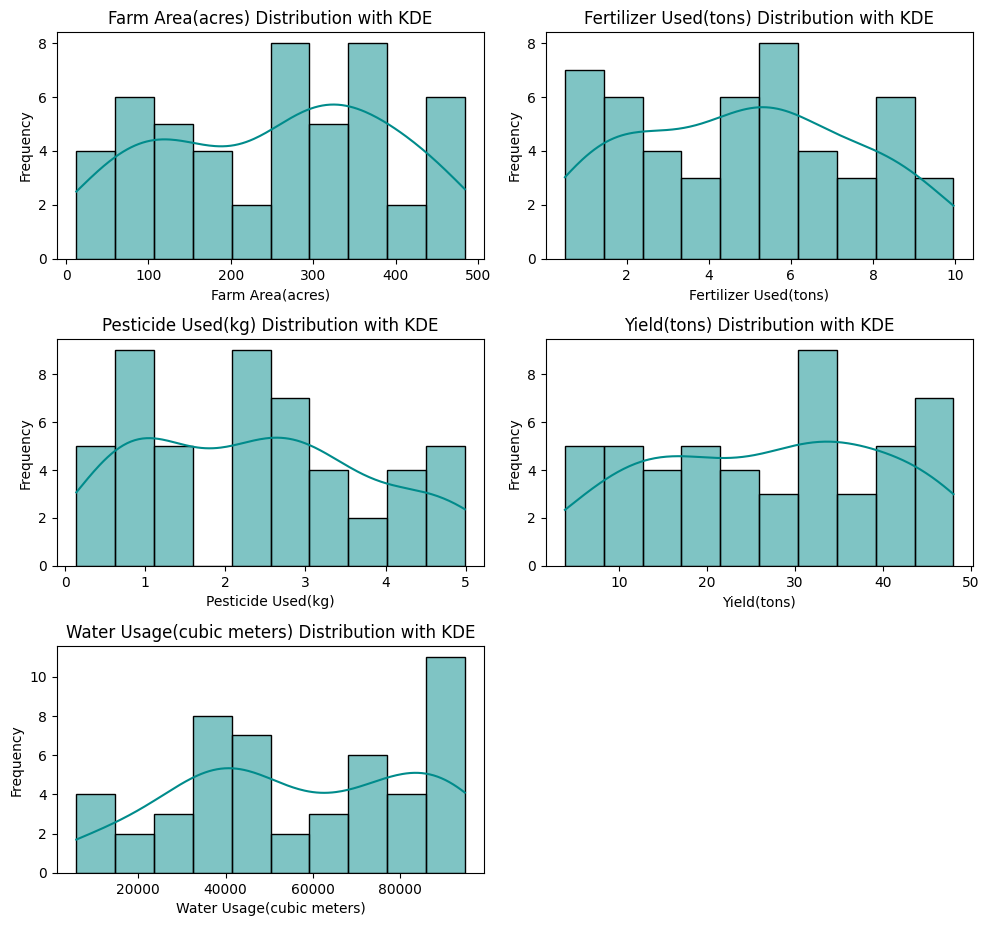

In [13]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=10, color='darkcyan')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

univariate_analysis(df, columns_to_analyze)

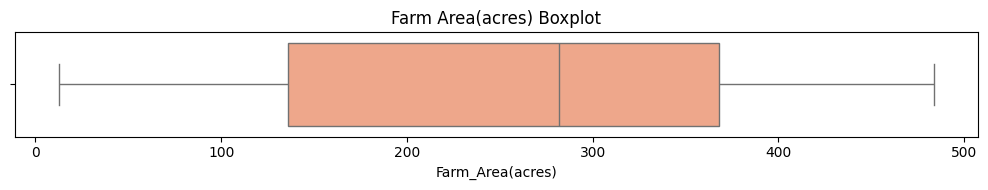


Summary Statistics for Farm Area(acres):
 count     50.000000
mean     254.963800
std      139.417782
min       12.500000
25%      135.710000
50%      281.980000
75%      368.107500
max      483.880000
Name: Farm_Area(acres), dtype: float64


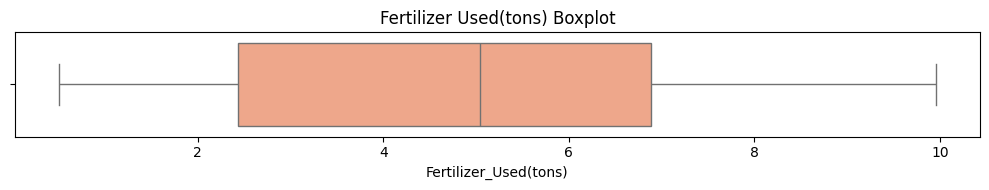


Summary Statistics for Fertilizer Used(tons):
 count    50.000000
mean      4.905400
std       2.732689
min       0.500000
25%       2.437500
50%       5.045000
75%       6.885000
max       9.960000
Name: Fertilizer_Used(tons), dtype: float64


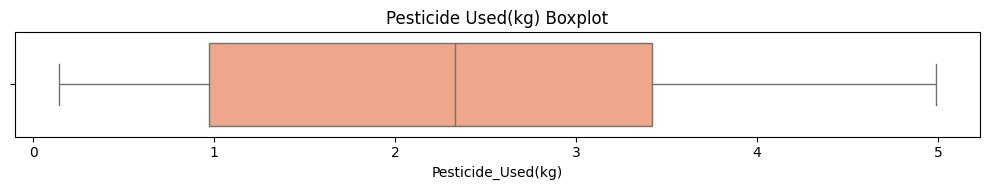


Summary Statistics for Pesticide Used(kg):
 count    50.000000
mean      2.398000
std       1.438613
min       0.140000
25%       0.972500
50%       2.330000
75%       3.417500
max       4.990000
Name: Pesticide_Used(kg), dtype: float64


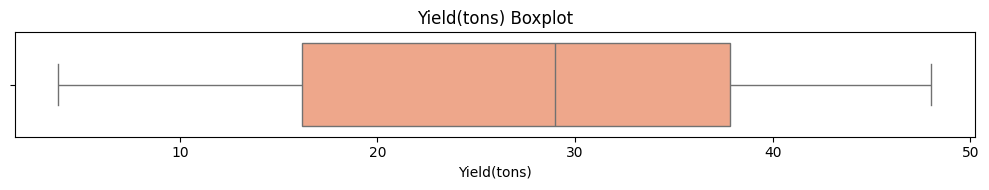


Summary Statistics for Yield(tons):
 count    50.000000
mean     27.059200
std      13.345789
min       3.860000
25%      16.190000
50%      28.970000
75%      37.860000
max      48.020000
Name: Yield(tons), dtype: float64


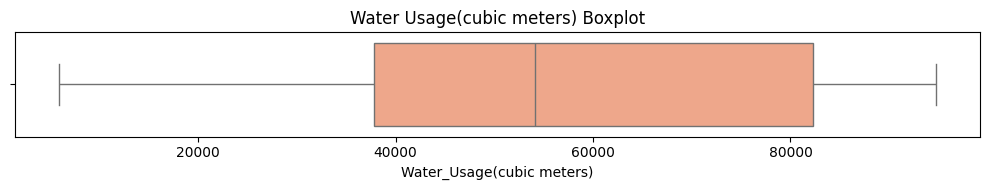


Summary Statistics for Water Usage(cubic meters):
 count       50.000000
mean     56724.295600
std      27264.992053
min       5869.750000
25%      37818.152500
50%      54097.075000
75%      82240.032500
max      94754.730000
Name: Water_Usage(cubic meters), dtype: float64


In [14]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='lightsalmon')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

In [15]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

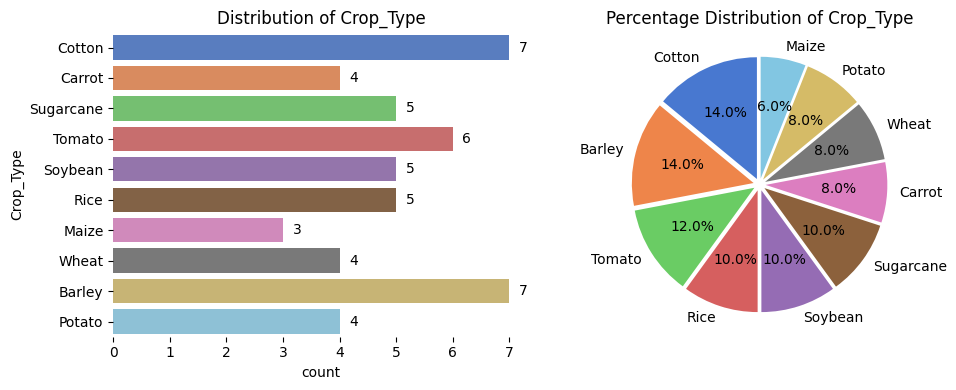

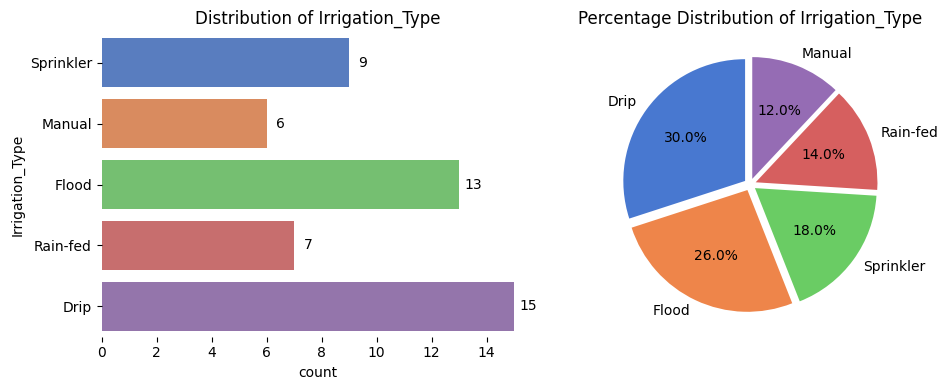

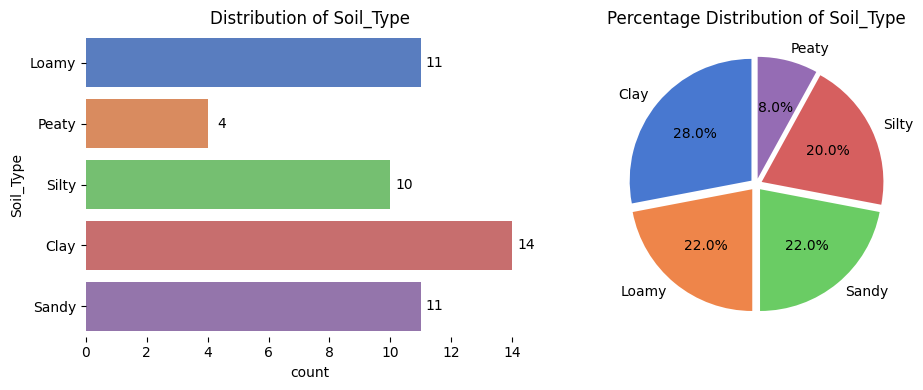

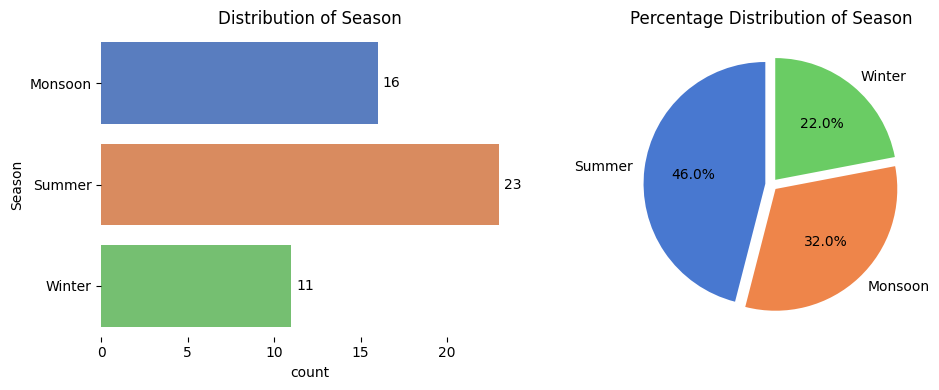

In [16]:
plot_categorical_distribution('Crop_Type')
plot_categorical_distribution('Irrigation_Type')
plot_categorical_distribution('Soil_Type')
plot_categorical_distribution('Season')

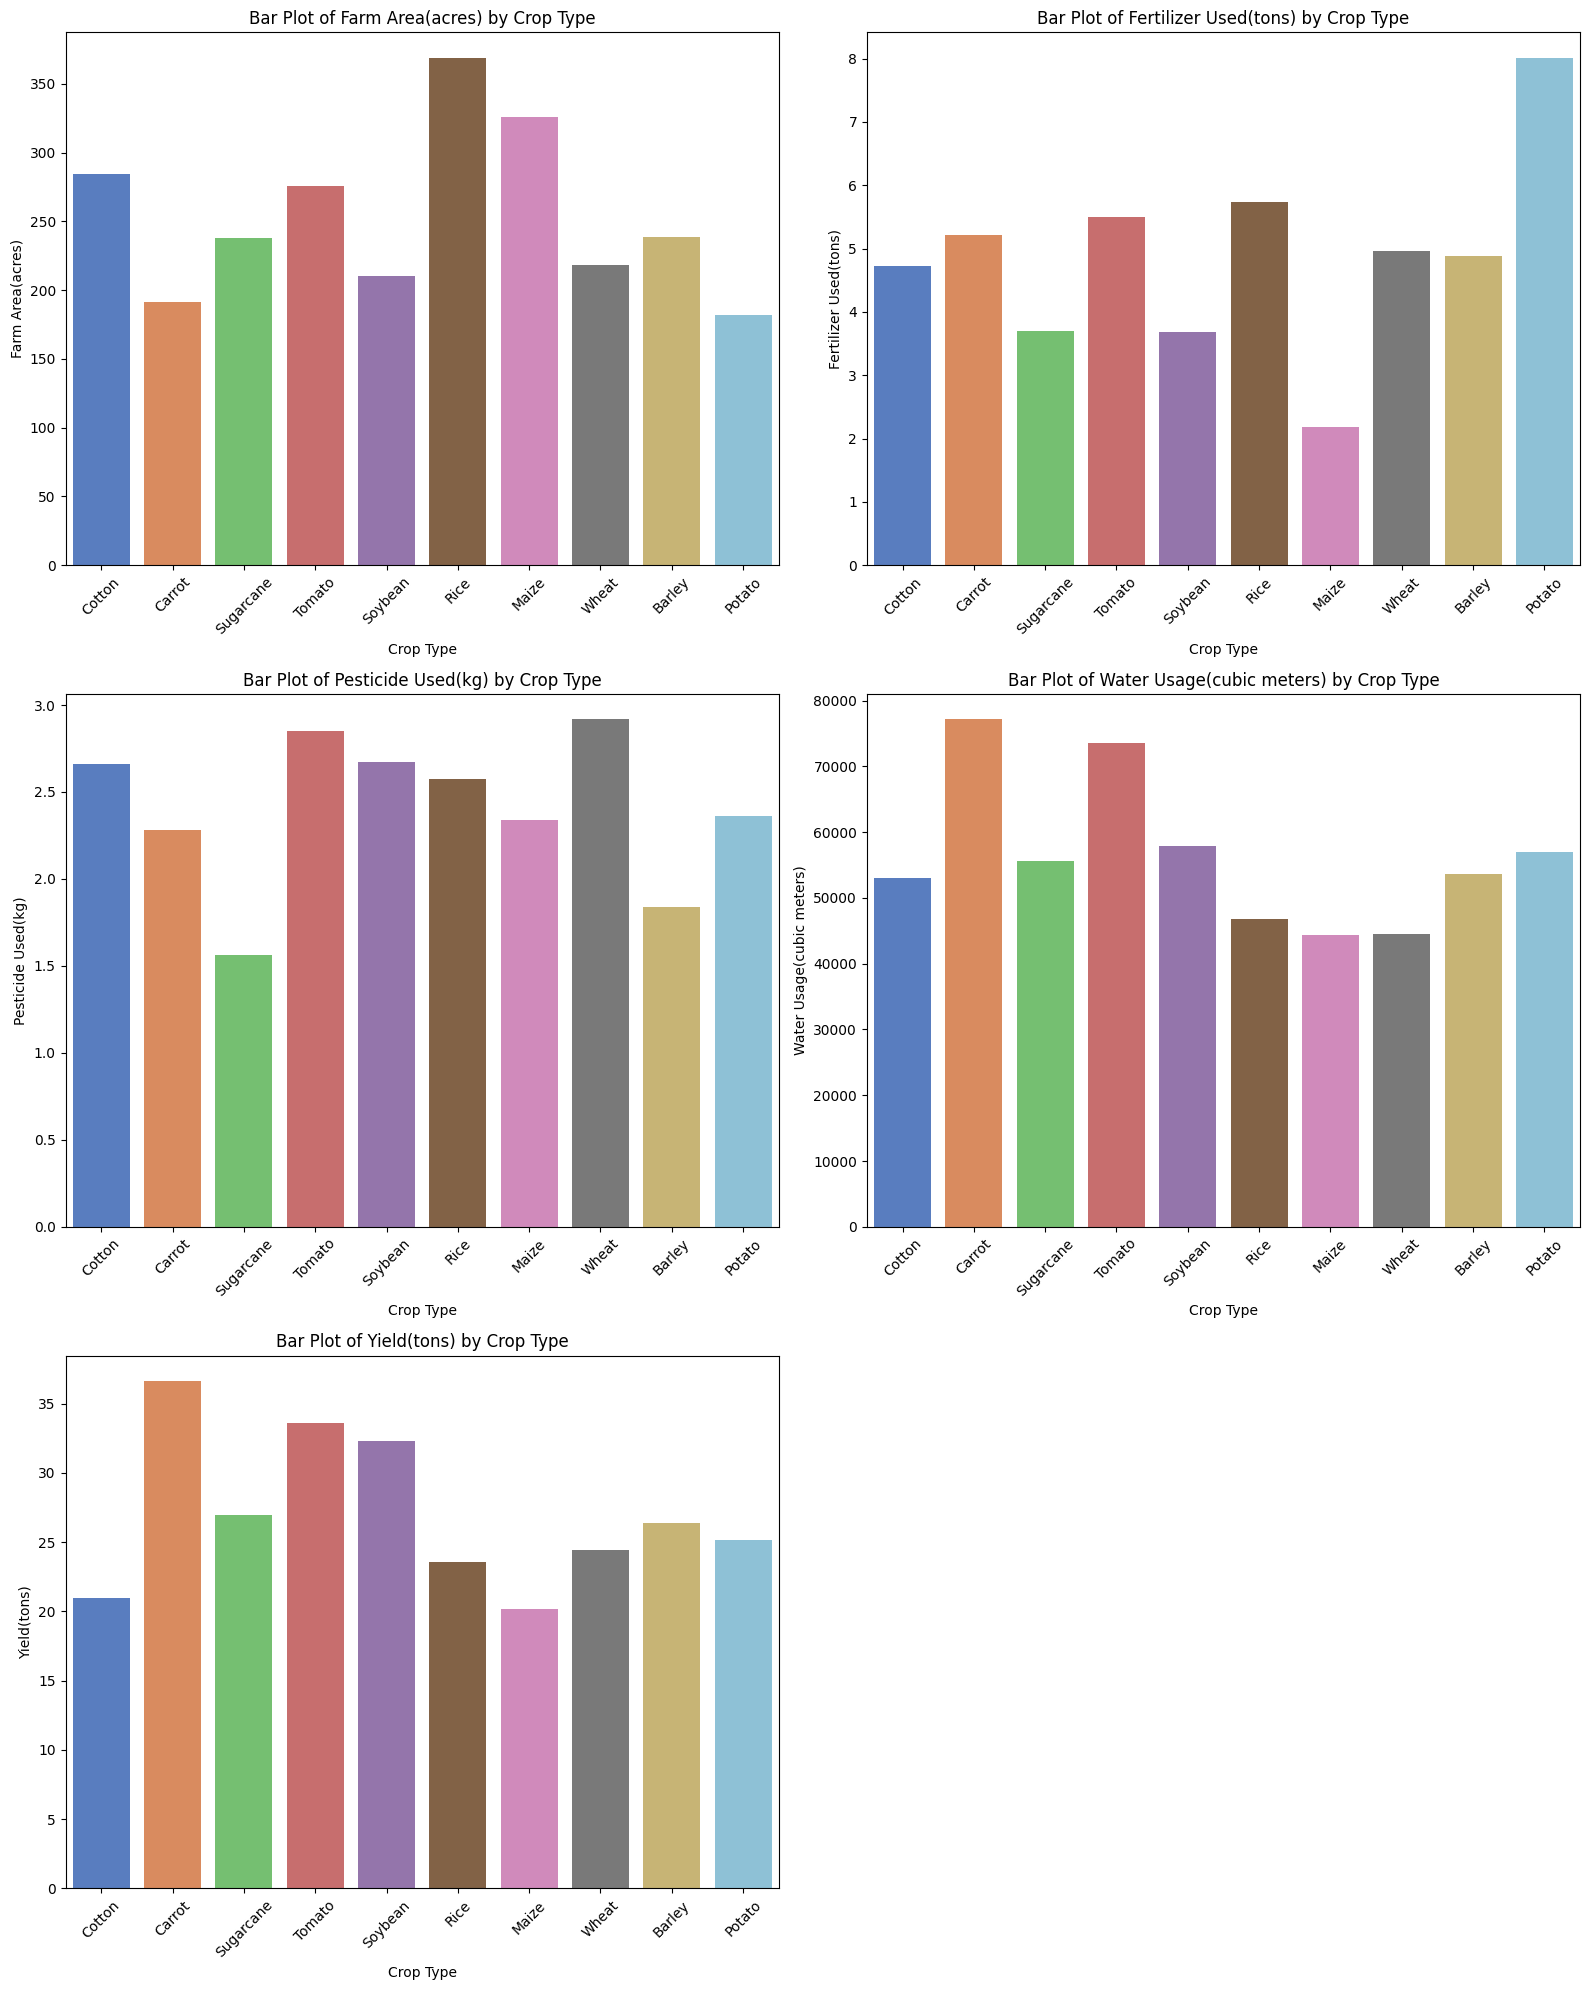

In [17]:
# Creating bar plots for each column by 'Crop_Type'
columns_to_plot = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Water_Usage(cubic meters)', 'Yield(tons)']

plt.figure(figsize=(16, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=df, x='Crop_Type', y=column, ci=None, palette='muted')
    plt.title(f'Bar Plot of {column.replace("_", " ")} by Crop Type')
    plt.xlabel('Crop Type')
    plt.ylabel(column.replace('_', ' '))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Identifying crop types with highest and lowest values for different metrics
# Creating a more readable output format
metrics_summary = {
    "Metric": [
        "Highest Yield", "Lowest Yield",
        "Highest Fertilizer Used", "Lowest Fertilizer Used",
        "Highest Pesticide Used", "Lowest Pesticide Used",
        "Highest Water Usage", "Lowest Water Usage",
        "Highest Farm Area", "Lowest Farm Area"
    ],
    "Crop Type": [
        df.loc[df['Yield(tons)'].idxmax()]['Crop_Type'], df.loc[df['Yield(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Crop_Type'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Crop_Type'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Crop_Type'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Crop_Type'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Crop_Type'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Crop_Type'], df.loc[df['Farm_Area(acres)'].idxmin()]['Crop_Type']
    ],
    "Value": [
        df.loc[df['Yield(tons)'].idxmax()]['Yield(tons)'], df.loc[df['Yield(tons)'].idxmin()]['Yield(tons)'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Fertilizer_Used(tons)'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Fertilizer_Used(tons)'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Pesticide_Used(kg)'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Pesticide_Used(kg)'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Water_Usage(cubic meters)'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Water_Usage(cubic meters)'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Farm_Area(acres)'], df.loc[df['Farm_Area(acres)'].idxmin()]['Farm_Area(acres)']
    ]
}

import pandas as pd
metrics_summary_df = pd.DataFrame(metrics_summary)
metrics_summary_df

,Metric,Crop Type,Value
0,Highest Yield,Tomato,48.02
1,Lowest Yield,Maize,3.86
2,Highest Fertilizer Used,Cotton,9.96
3,Lowest Fertilizer Used,Cotton,0.50
4,Highest Pesticide Used,Rice,4.99
5,Lowest Pesticide Used,Barley,0.14
6,Highest Water Usage,Cotton,94754.73
7,Lowest Water Usage,Rice,5869.75
8,Highest Farm Area,Rice,483.88
9,Lowest Farm Area,Sugarcane,12.50


In [19]:
# Create a table showing Crop Types and corresponding Farm IDs for each crop type
crop_farm_table = df.groupby('Crop_Type')['Farm_ID'].apply(list).reset_index()

crop_farm_table

,Crop_Type,Farm_ID
0,Barley,"[F016, F020, F025, F031, F033, F038, F049]"
1,Carrot,"[F002, F017, F032, F046]"
2,Cotton,"[F001, F021, F027, F036, F039, F040, F043]"
3,Maize,"[F009, F018, F019]"
4,Potato,"[F023, F030, F047, F048]"
5,Rice,"[F008, F011, F014, F024, F041]"
6,Soybean,"[F007, F010, F035, F037, F044]"
7,Sugarcane,"[F003, F006, F012, F015, F042]"
8,Tomato,"[F004, F005, F028, F034, F045, F050]"
9,Wheat,"[F013, F022, F026, F029]"


In [20]:
# Checking if any farms have multiple crop types
multiple_crops_per_farm = df.groupby('Farm_ID')['Crop_Type'].nunique().reset_index()
multiple_crops_per_farm = multiple_crops_per_farm[multiple_crops_per_farm['Crop_Type'] > 1]

# Displaying the result or a message if no farm has multiple crops
if not multiple_crops_per_farm.empty:
    import ace_tools as tools; tools.display_dataframe_to_user(name="Farms with Multiple Crop Types", dataframe=multiple_crops_per_farm)
else:
    print("No farms have multiple crop types.")

No farms have multiple crop types.


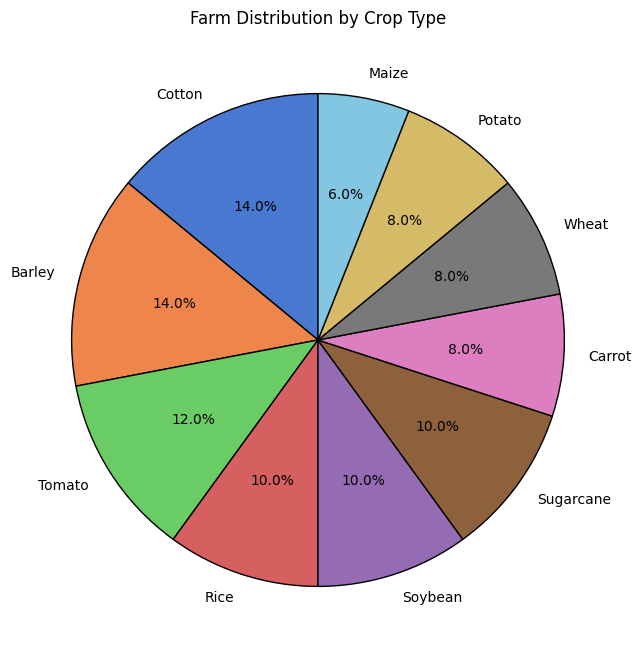

In [21]:
# Plotting the pie chart for farm distribution by crop type
plt.figure(figsize=(8, 8))
crop_type_counts = df['Crop_Type'].value_counts()
plt.pie(crop_type_counts, labels=crop_type_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})

plt.title('Farm Distribution by Crop Type')
plt.show()


In [22]:
# Calculating the total area for each crop type
total_area_per_crop = df.groupby('Crop_Type')['Farm_Area(acres)'].sum().reset_index()

total_area_per_crop

,Crop_Type,Farm_Area(acres)
0,Barley,1671.22
1,Carrot,765.90
2,Cotton,1993.80
3,Maize,978.53
4,Potato,727.24
5,Rice,1845.24
6,Soybean,1050.68
7,Sugarcane,1187.99
8,Tomato,1655.02
9,Wheat,872.57


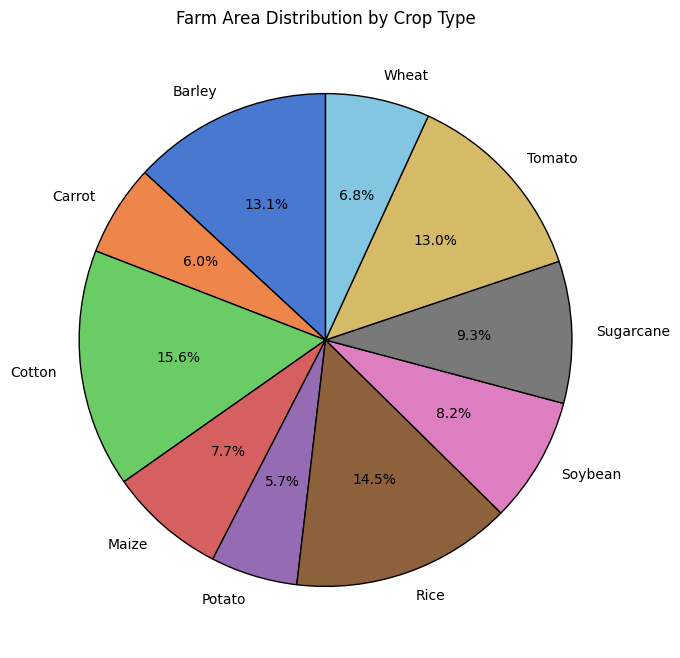

In [23]:
# Plotting a pie chart for the distribution of total Farm_Area(acres) by crop type
plt.figure(figsize=(8, 8))
total_area_per_crop = df.groupby('Crop_Type')['Farm_Area(acres)'].sum()

plt.pie(total_area_per_crop, labels=total_area_per_crop.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})

plt.title('Farm Area Distribution by Crop Type')
plt.show()

In [24]:
# Identifying the crop types and the corresponding soil types they grow in
crop_soil_table = df.groupby('Crop_Type')['Soil_Type'].unique().reset_index()

crop_soil_table

,Crop_Type,Soil_Type
0,Barley,"[Sandy, Silty, Clay, Loamy]"
1,Carrot,"[Peaty, Loamy, Clay]"
2,Cotton,"[Loamy, Clay, Sandy]"
3,Maize,"[Peaty, Loamy, Sandy]"
4,Potato,"[Loamy, Sandy, Silty]"
5,Rice,"[Silty, Clay, Sandy]"
6,Soybean,"[Sandy, Silty, Loamy]"
7,Sugarcane,"[Silty, Loamy, Clay, Peaty]"
8,Tomato,"[Silty, Clay, Loamy, Peaty]"
9,Wheat,"[Clay, Loamy, Silty]"


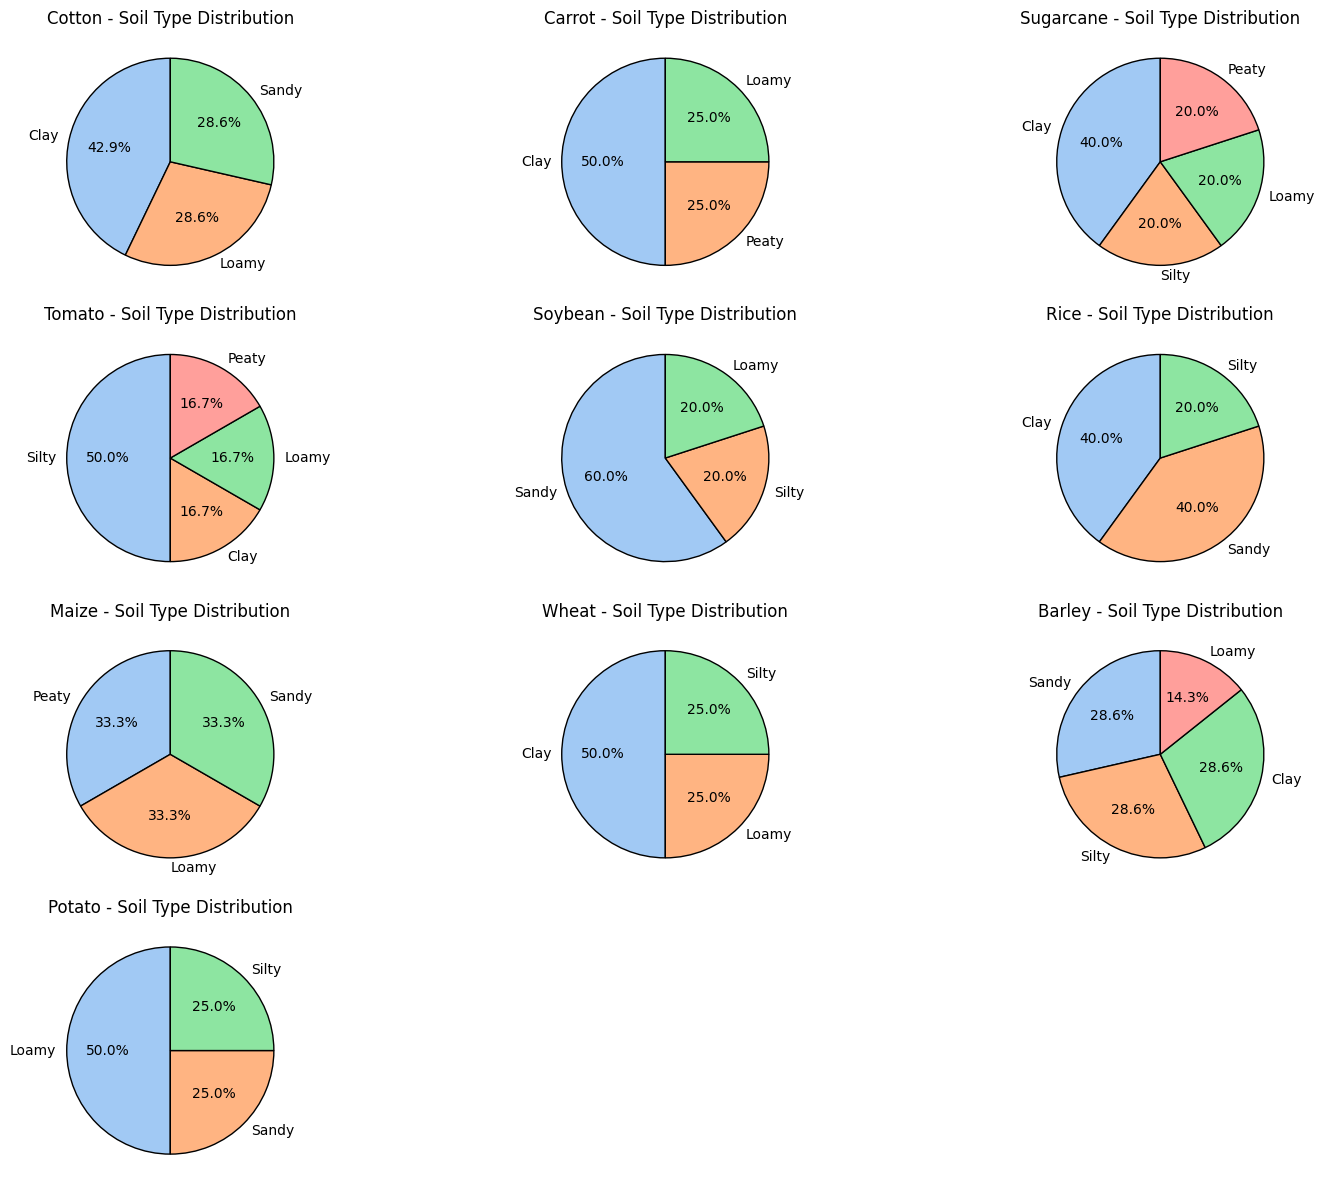

In [25]:
# Plotting pie charts for each crop type to show distribution of soil types they grow in
unique_crops = df['Crop_Type'].unique()

# Set up a grid for multiple pie charts
plt.figure(figsize=(15, 12))
for i, crop in enumerate(unique_crops, 1):
    plt.subplot(4, 3, i)
    soil_distribution = df[df['Crop_Type'] == crop]['Soil_Type'].value_counts()
    plt.pie(soil_distribution, labels=soil_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Soil Type Distribution')

plt.tight_layout()
plt.show()

In [26]:
# Identifying the crop types and the corresponding seasons they are grown in
crop_season_table = df.groupby('Crop_Type')['Season'].unique().reset_index()

crop_season_table

,Crop_Type,Season
0,Barley,"[Summer, Monsoon]"
1,Carrot,"[Monsoon, Summer, Winter]"
2,Cotton,"[Monsoon, Winter, Summer]"
3,Maize,"[Winter, Summer]"
4,Potato,"[Summer, Monsoon]"
5,Rice,"[Monsoon, Summer, Winter]"
6,Soybean,"[Winter, Monsoon, Summer]"
7,Sugarcane,"[Monsoon, Summer]"
8,Tomato,"[Summer, Winter, Monsoon]"
9,Wheat,"[Summer, Winter]"


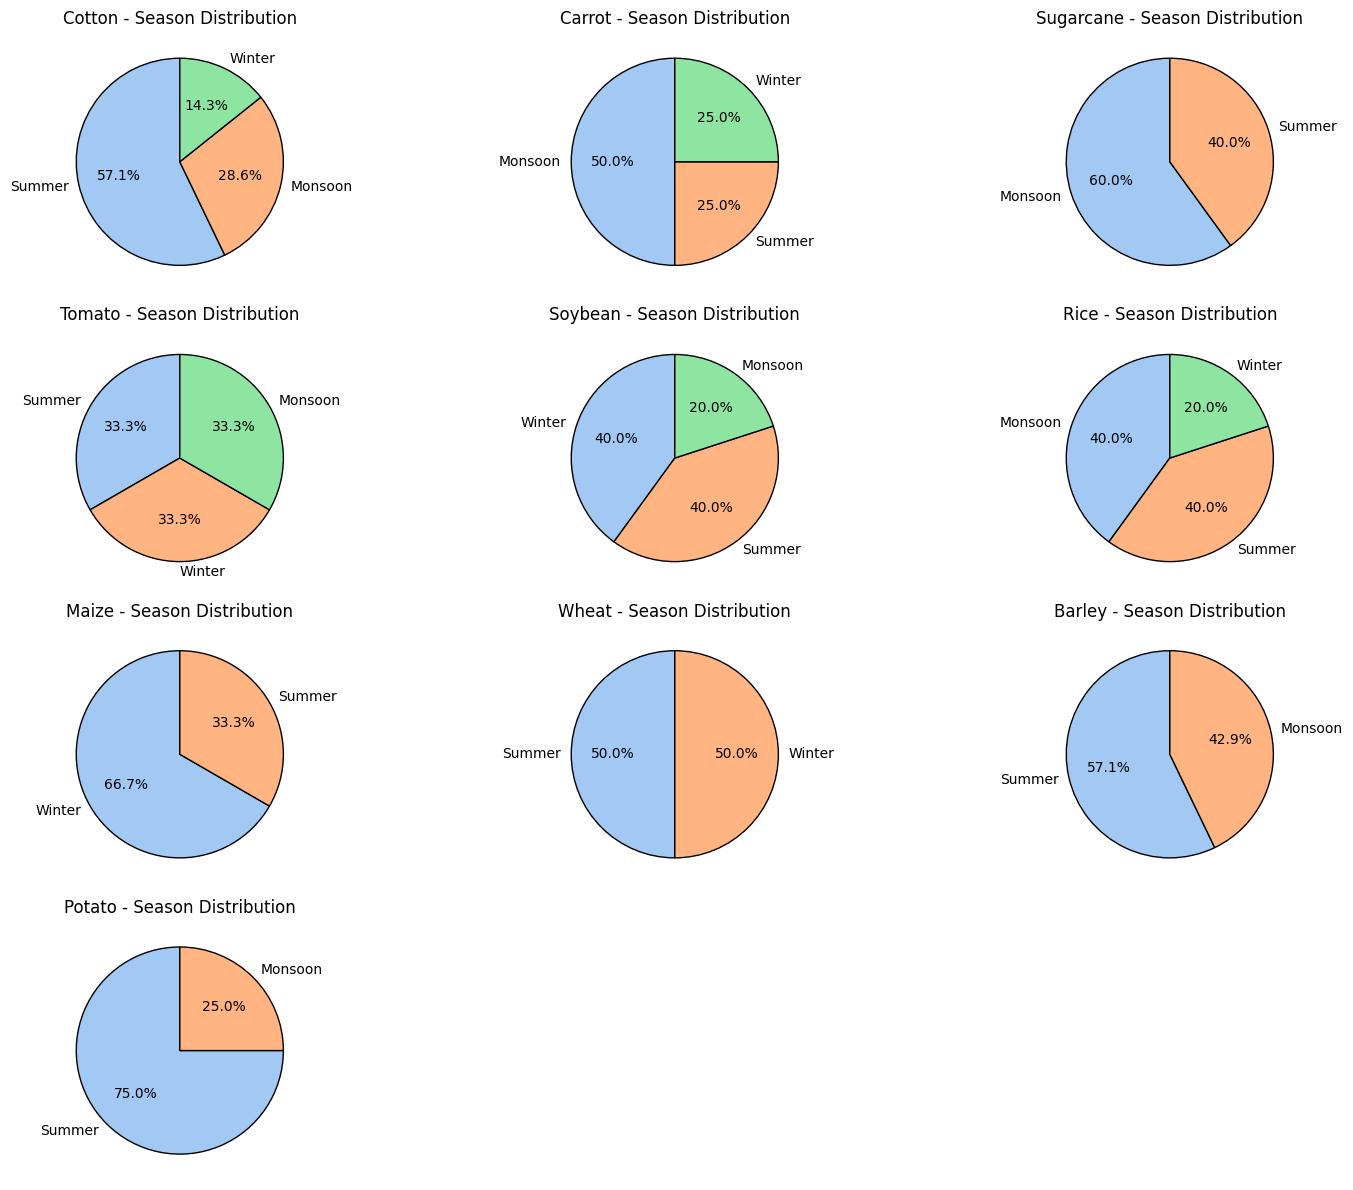

In [27]:
# Plotting pie charts for each crop type to show distribution of seasons they are grown in
plt.figure(figsize=(15, 12))
for i, crop in enumerate(df['Crop_Type'].unique(), 1):
    plt.subplot(4, 3, i)
    season_distribution = df[df['Crop_Type'] == crop]['Season'].value_counts()
    plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Season Distribution')

plt.tight_layout()
plt.show()

In [28]:
# Identifying the soil type with the highest crop yield for each crop type
highest_yield_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Yield(tons)'].mean().reset_index()
max_yield_per_crop = highest_yield_per_crop_soil.loc[highest_yield_per_crop_soil.groupby('Crop_Type')['Yield(tons)'].idxmax()]

print("Soil Type with Highest Yield for Each Crop Type:")
display(max_yield_per_crop)

# Identifying the soil type with the lowest crop yield for each crop type
min_yield_per_crop = highest_yield_per_crop_soil.loc[highest_yield_per_crop_soil.groupby('Crop_Type')['Yield(tons)'].idxmin()]

print("\nSoil Type with Lowest Yield for Each Crop Type:")
display(min_yield_per_crop)

Soil Type with Highest Yield for Each Crop Type:


,Crop_Type,Soil_Type,Yield(tons)
1,Barley,Loamy,46.470
5,Carrot,Loamy,47.700
9,Cotton,Sandy,28.820
12,Maize,Sandy,39.960
14,Potato,Sandy,31.470
16,Rice,Clay,33.655
19,Soybean,Loamy,40.150
23,Sugarcane,Loamy,38.180
26,Tomato,Clay,43.280
32,Wheat,Silty,36.900



Soil Type with Lowest Yield for Each Crop Type:


,Crop_Type,Soil_Type,Yield(tons)
2,Barley,Sandy,17.440000
4,Carrot,Clay,27.955000
8,Cotton,Loamy,13.485000
11,Maize,Peaty,3.860000
15,Potato,Silty,20.530000
18,Rice,Silty,4.230000
20,Soybean,Sandy,28.983333
22,Sugarcane,Clay,17.185000
27,Tomato,Loamy,12.920000
30,Wheat,Clay,18.070000


In [29]:
# Identifying the soil type with the highest Fertilizer Used for each crop type
highest_fertilizer_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Fertilizer_Used(tons)'].mean().reset_index()
max_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmax()]

print("Soil Type with Highest Fertilizer Used for Each Crop Type:")
display(max_fertilizer_per_crop)

# Identifying the soil type with the lowest Fertilizer Used for each crop type
min_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmin()]

print("\nSoil Type with Lowest Fertilizer Used for Each Crop Type:")
display(min_fertilizer_per_crop)

Soil Type with Highest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
1,Barley,Loamy,7.790
5,Carrot,Loamy,5.890
8,Cotton,Loamy,6.245
10,Maize,Loamy,4.910
13,Potato,Loamy,9.430
16,Rice,Clay,7.165
21,Soybean,Silty,8.570
23,Sugarcane,Loamy,6.420
26,Tomato,Clay,8.330
30,Wheat,Clay,6.105



Soil Type with Lowest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
2,Barley,Sandy,2.900
6,Carrot,Peaty,4.770
9,Cotton,Sandy,2.100
11,Maize,Peaty,0.570
14,Potato,Sandy,3.860
17,Rice,Sandy,4.595
19,Soybean,Loamy,1.180
22,Sugarcane,Clay,1.895
27,Tomato,Loamy,4.750
32,Wheat,Silty,1.790


In [30]:
# Identifying the soil type with the highest Water Usage for each crop type
highest_water_usage_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Water_Usage(cubic meters)'].mean().reset_index()
max_water_usage_per_crop = highest_water_usage_per_crop_soil.loc[highest_water_usage_per_crop_soil.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmax()]

# Identifying the soil type with the lowest Water Usage for each crop type
min_water_usage_per_crop = highest_water_usage_per_crop_soil.loc[highest_water_usage_per_crop_soil.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmin()]

# Displaying the results
print("Soil Type with Highest Water Usage for Each Crop Type:")
display(max_water_usage_per_crop)

print("\nSoil Type with Lowest Water Usage for Each Crop Type:")
display(min_water_usage_per_crop)

Soil Type with Highest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Water_Usage(cubic meters)
1,Barley,Loamy,93656.060
5,Carrot,Loamy,88301.460
8,Cotton,Loamy,57761.240
11,Maize,Peaty,60202.140
14,Potato,Sandy,86989.880
17,Rice,Sandy,78580.925
19,Soybean,Loamy,73646.550
25,Sugarcane,Silty,75538.560
26,Tomato,Clay,93718.690
31,Wheat,Loamy,65838.400



Soil Type with Lowest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Water_Usage(cubic meters)
3,Barley,Silty,39956.880000
6,Carrot,Peaty,68725.540000
7,Cotton,Clay,49551.673333
10,Maize,Loamy,18660.030000
15,Potato,Silty,5874.170000
18,Rice,Silty,9392.380000
21,Soybean,Silty,43610.210000
24,Sugarcane,Peaty,33615.770000
28,Tomato,Peaty,37466.110000
32,Wheat,Silty,23208.040000


In [31]:
# Identifying the soil and irrigation type with the highest Water Usage for each crop type
highest_water_usage_per_crop = df.groupby(['Crop_Type', 'Soil_Type', 'Irrigation_Type'])['Water_Usage(cubic meters)'].mean().reset_index()
max_water_usage_per_crop = highest_water_usage_per_crop.loc[highest_water_usage_per_crop.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmax()]

# Identifying the soil and irrigation type with the lowest Water Usage for each crop type
min_water_usage_per_crop = highest_water_usage_per_crop.loc[highest_water_usage_per_crop.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmin()]

# Displaying the results
print("Soil and Irrigation Type with Highest Water Usage for Each Crop Type:")
display(max_water_usage_per_crop)

print("\nSoil and Irrigation Type with Lowest Water Usage for Each Crop Type:")
display(min_water_usage_per_crop)

Soil and Irrigation Type with Highest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Irrigation_Type,Water_Usage(cubic meters)
2,Barley,Loamy,Drip,93656.060
9,Carrot,Loamy,Manual,88301.460
16,Cotton,Sandy,Flood,94754.730
19,Maize,Peaty,Drip,60202.140
22,Potato,Loamy,Rain-fed,93407.380
26,Rice,Sandy,Flood,78580.925
28,Soybean,Loamy,Manual,73646.550
32,Sugarcane,Clay,Flood,88976.510
37,Tomato,Clay,Sprinkler,93718.690
44,Wheat,Loamy,Flood,65838.400



Soil and Irrigation Type with Lowest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Irrigation_Type,Water_Usage(cubic meters)
3,Barley,Sandy,Flood,25132.48
10,Carrot,Peaty,Manual,68725.54
17,Cotton,Sandy,Rain-fed,12007.70
18,Maize,Loamy,Rain-fed,18660.03
24,Potato,Silty,Sprinkler,5874.17
27,Rice,Silty,Drip,9392.38
30,Soybean,Sandy,Manual,40614.40
35,Sugarcane,Peaty,Rain-fed,33615.77
39,Tomato,Peaty,Sprinkler,37466.11
45,Wheat,Silty,Manual,23208.04


In [32]:
# Identifying the season and irrigation type with the highest crop yield for each crop type
highest_yield_per_crop_season_irrigation = df.groupby(['Crop_Type', 'Season', 'Irrigation_Type'])['Yield(tons)'].mean().reset_index()
max_yield_per_crop = highest_yield_per_crop_season_irrigation.loc[highest_yield_per_crop_season_irrigation.groupby('Crop_Type')['Yield(tons)'].idxmax()]

# Identifying the season and irrigation type with the lowest crop yield for each crop type
min_yield_per_crop = highest_yield_per_crop_season_irrigation.loc[highest_yield_per_crop_season_irrigation.groupby('Crop_Type')['Yield(tons)'].idxmin()]

# Displaying the results
print("Season and Irrigation Type with Highest Crop Yield for Each Crop Type:")
display(max_yield_per_crop)

print("\nSeason and Irrigation Type with Lowest Crop Yield for Each Crop Type:")
display(min_yield_per_crop)

Season and Irrigation Type with Highest Crop Yield for Each Crop Type:


,Crop_Type,Season,Irrigation_Type,Yield(tons)
2,Barley,Summer,Drip,46.470
6,Carrot,Summer,Manual,47.700
12,Cotton,Summer,Rain-fed,46.190
14,Maize,Summer,Drip,39.960
17,Potato,Monsoon,Drip,31.470
22,Rice,Monsoon,Flood,35.010
28,Soybean,Winter,Drip,44.930
32,Sugarcane,Summer,Sprinkler,32.235
38,Tomato,Winter,Flood,48.020
40,Wheat,Summer,Manual,36.900



Season and Irrigation Type with Lowest Crop Yield for Each Crop Type:


,Crop_Type,Season,Irrigation_Type,Yield(tons)
3,Barley,Summer,Flood,11.343333
7,Carrot,Winter,Flood,24.340000
10,Cotton,Summer,Flood,10.990000
15,Maize,Winter,Drip,3.860000
18,Potato,Summer,Drip,18.130000
21,Rice,Monsoon,Drip,4.230000
25,Soybean,Monsoon,Drip,17.250000
30,Sugarcane,Monsoon,Flood,20.760000
37,Tomato,Winter,Drip,12.920000
39,Wheat,Summer,Drip,5.440000


In [33]:
# Identifying the season with the highest Pesticide Used for each crop type
highest_pesticide_usage_per_crop_season = df.groupby(['Crop_Type', 'Season'])['Pesticide_Used(kg)'].mean().reset_index()
max_pesticide_usage_per_crop = highest_pesticide_usage_per_crop_season.loc[highest_pesticide_usage_per_crop_season.groupby('Crop_Type')['Pesticide_Used(kg)'].idxmax()]

# Identifying the season with the lowest Pesticide Used for each crop type
min_pesticide_usage_per_crop = highest_pesticide_usage_per_crop_season.loc[highest_pesticide_usage_per_crop_season.groupby('Crop_Type')['Pesticide_Used(kg)'].idxmin()]

# Displaying results
print("Season with Highest Pesticide Used for Each Crop Type:")
display(max_pesticide_usage_per_crop)

print("\nSeason with Lowest Pesticide Used for Each Crop Type:")
display(min_pesticide_usage_per_crop)

Season with Highest Pesticide Used for Each Crop Type:


,Crop_Type,Season,Pesticide_Used(kg)
0,Barley,Monsoon,2.213333
4,Carrot,Winter,2.940000
5,Cotton,Monsoon,3.485000
9,Maize,Winter,2.850000
10,Potato,Monsoon,2.680000
14,Rice,Winter,3.450000
16,Soybean,Summer,2.890000
18,Sugarcane,Monsoon,1.660000
21,Tomato,Summer,4.415000
24,Wheat,Winter,3.030000



Season with Lowest Pesticide Used for Each Crop Type:


,Crop_Type,Season,Pesticide_Used(kg)
1,Barley,Summer,1.560000
3,Carrot,Summer,0.810000
7,Cotton,Winter,0.910000
8,Maize,Summer,1.310000
11,Potato,Summer,2.253333
13,Rice,Summer,1.765000
17,Soybean,Winter,2.450000
19,Sugarcane,Summer,1.415000
20,Tomato,Monsoon,0.655000
23,Wheat,Summer,2.805000


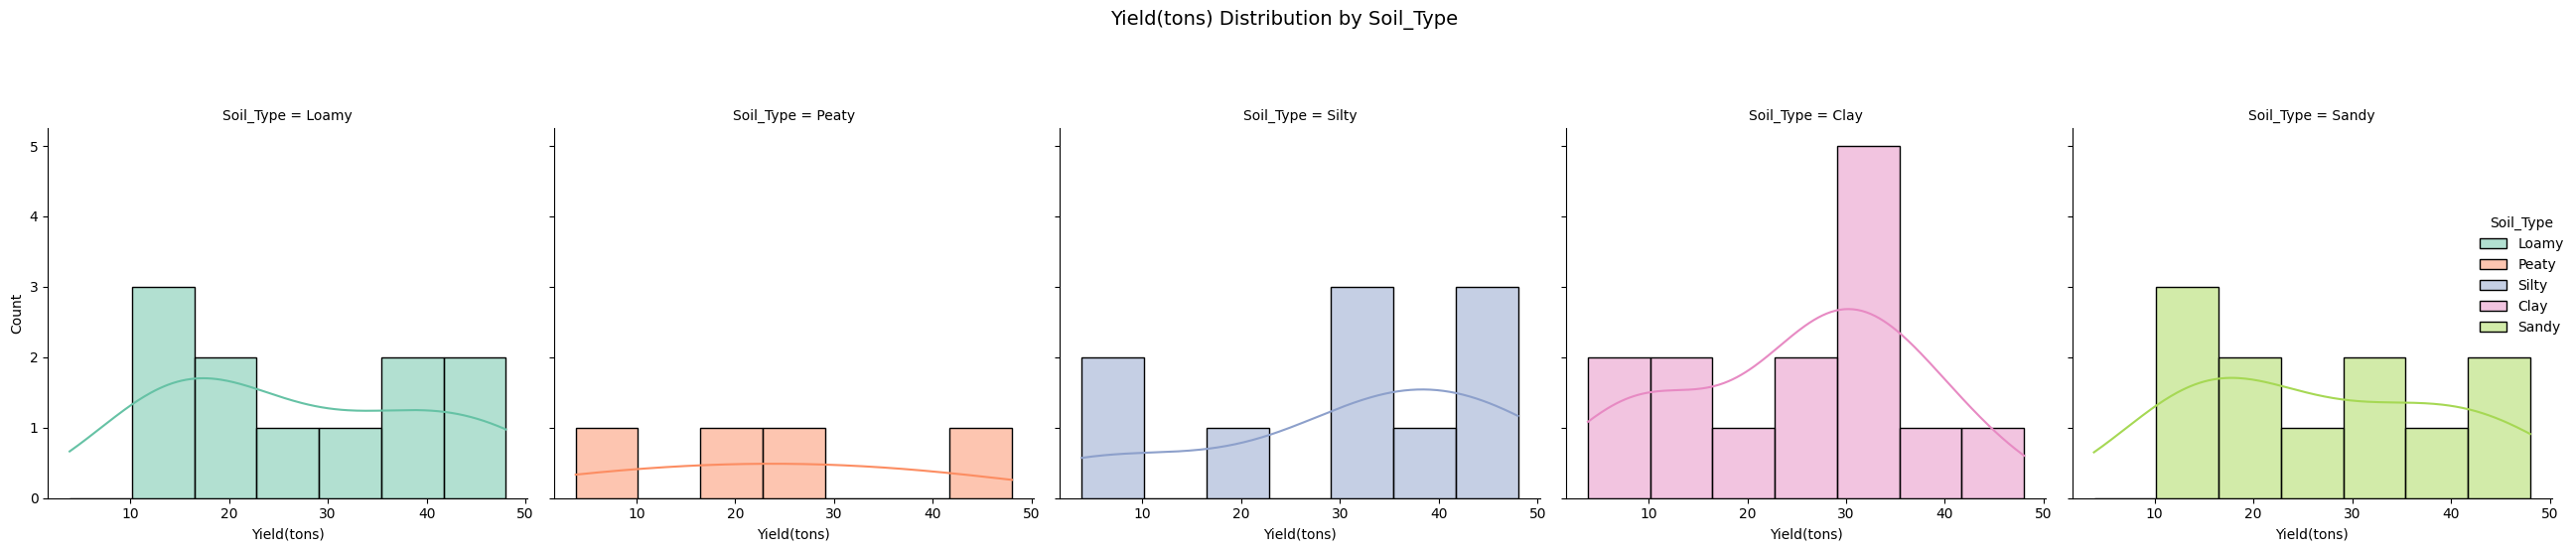

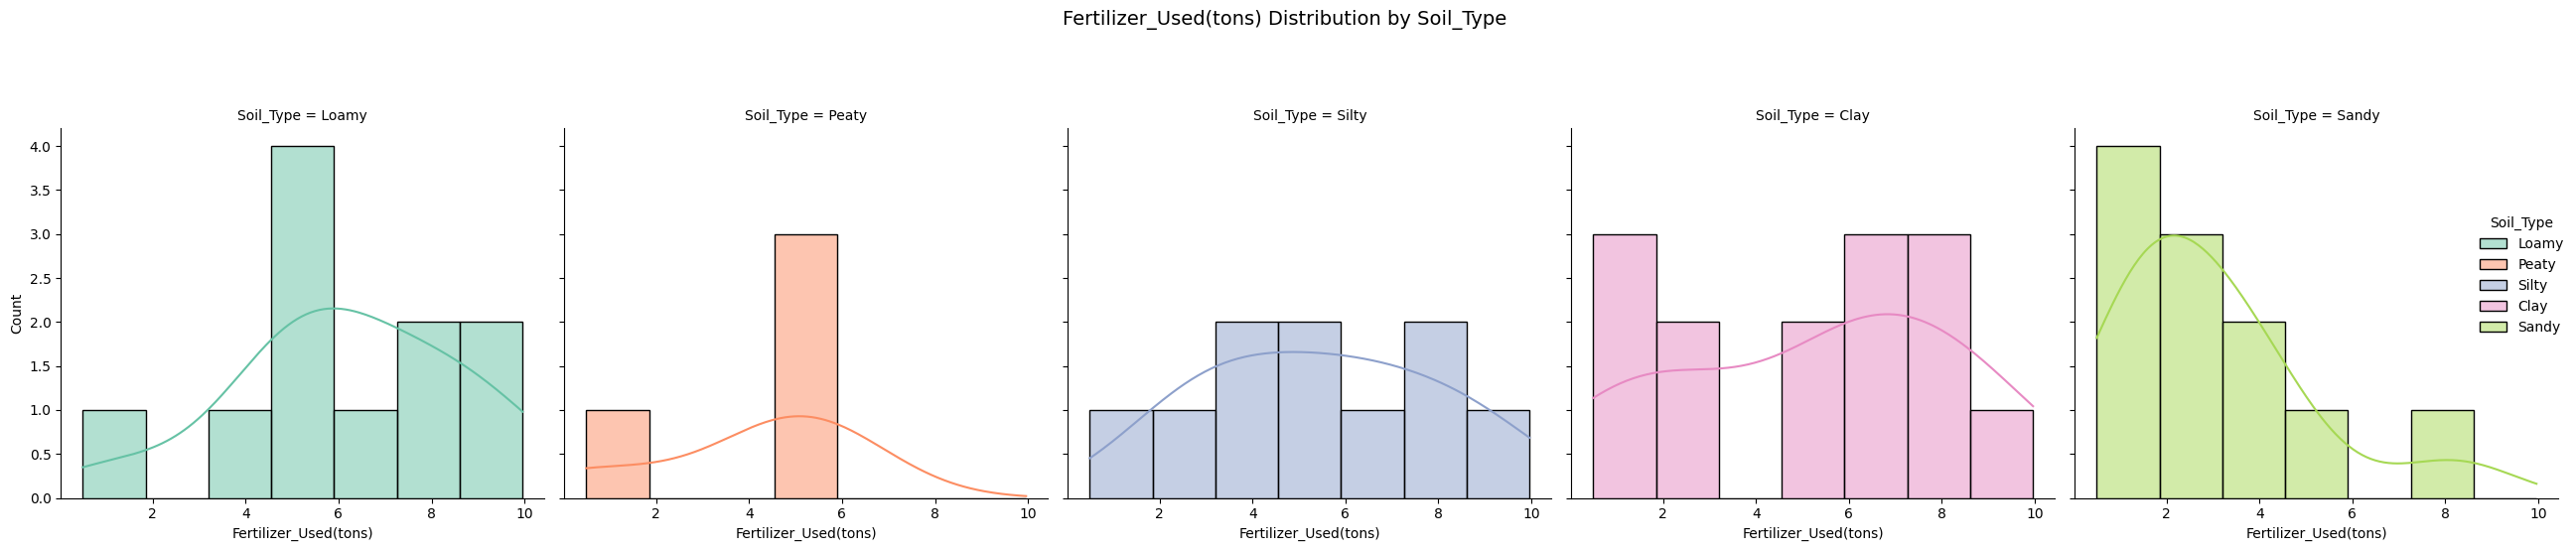

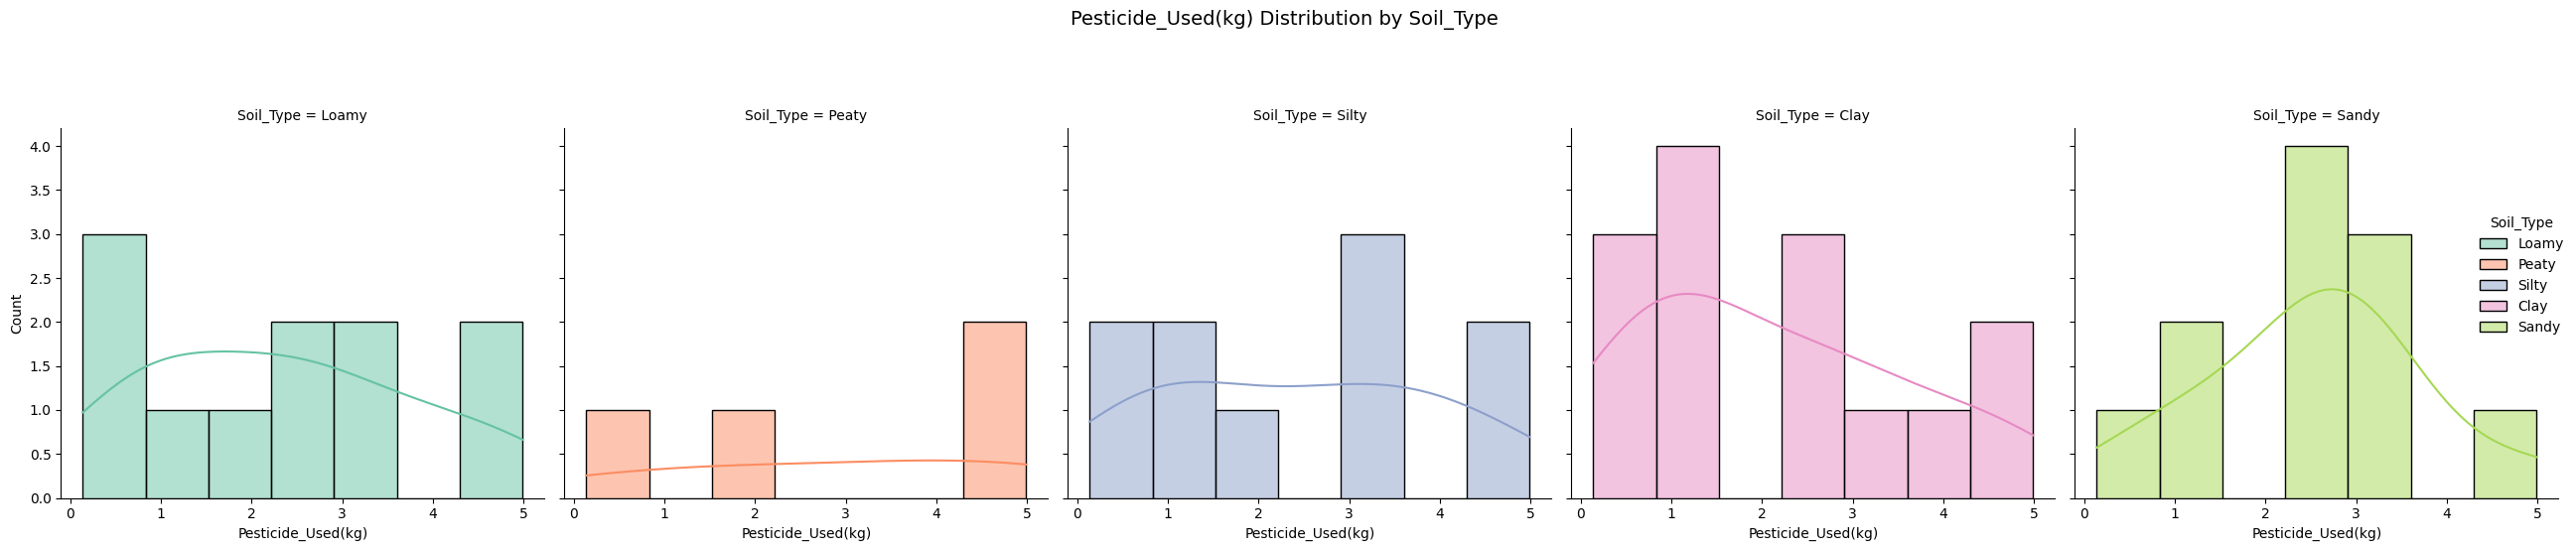

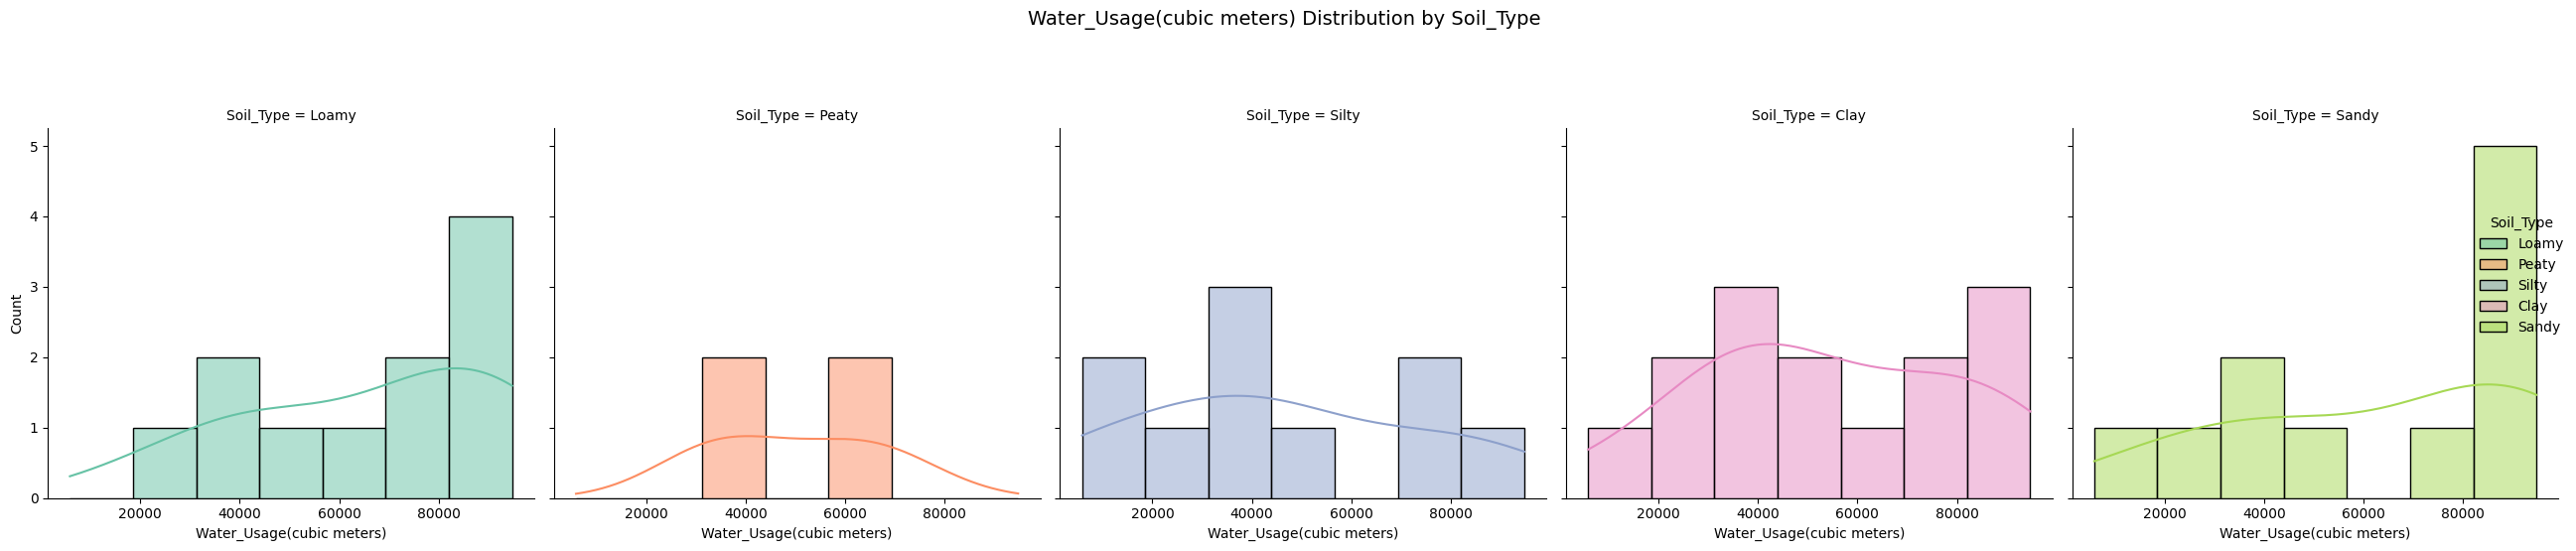

In [34]:
def create_displots(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=14, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Yield(tons)", "Fertilizer_Used(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots(df, columns_to_plot, col='Soil_Type', hue='Soil_Type')

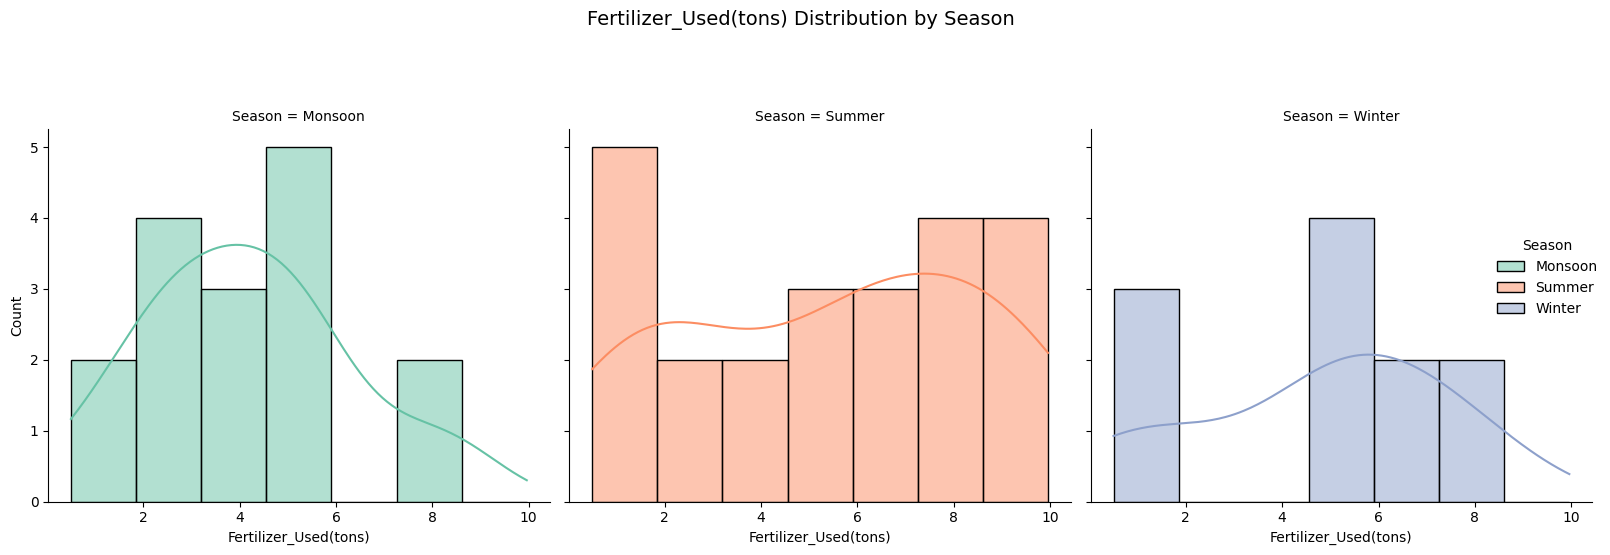

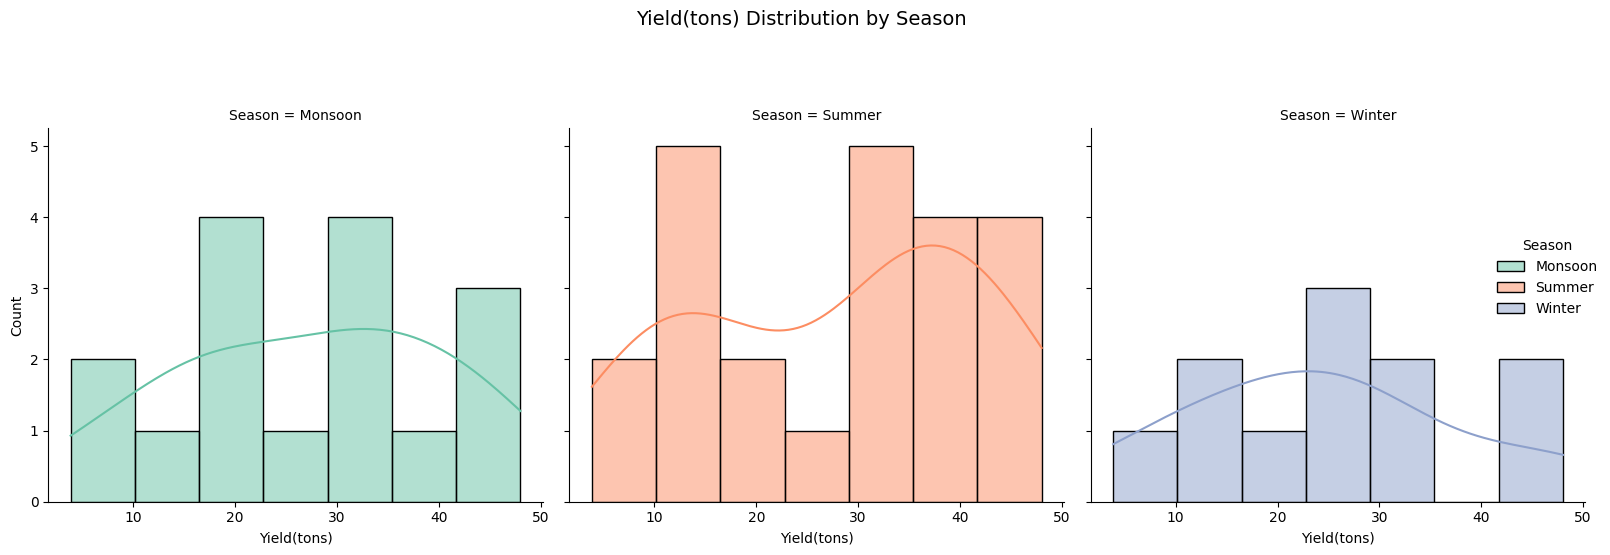

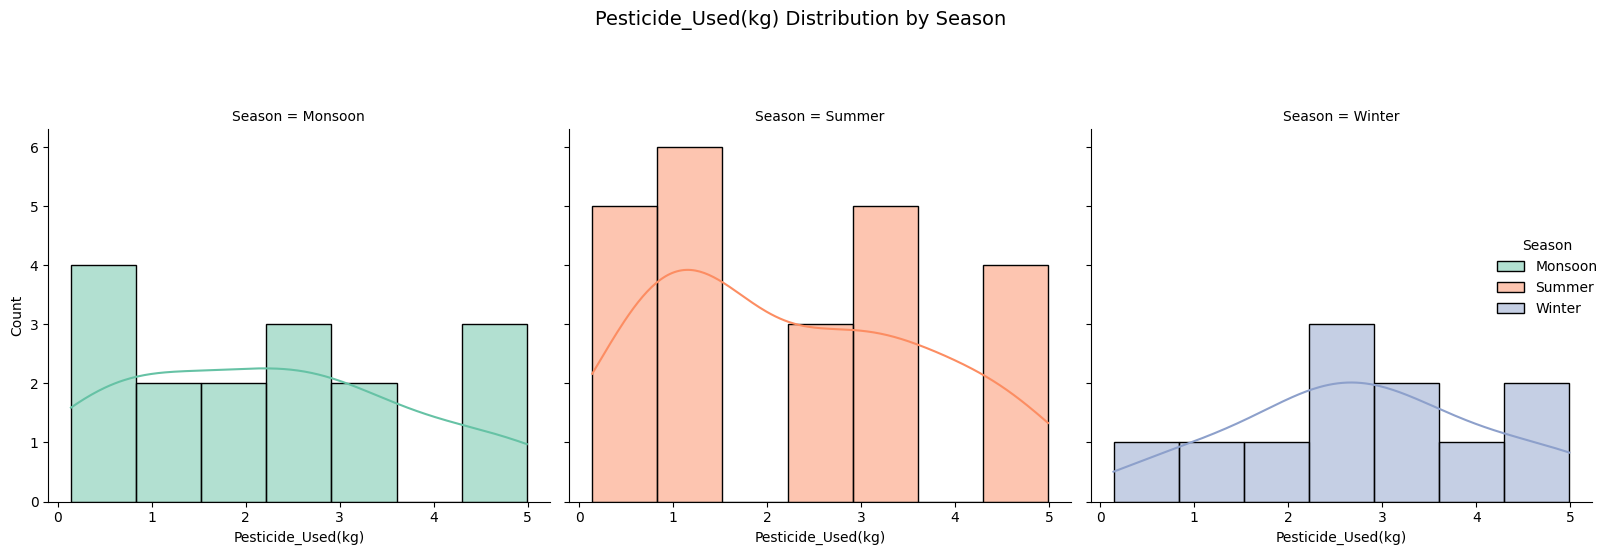

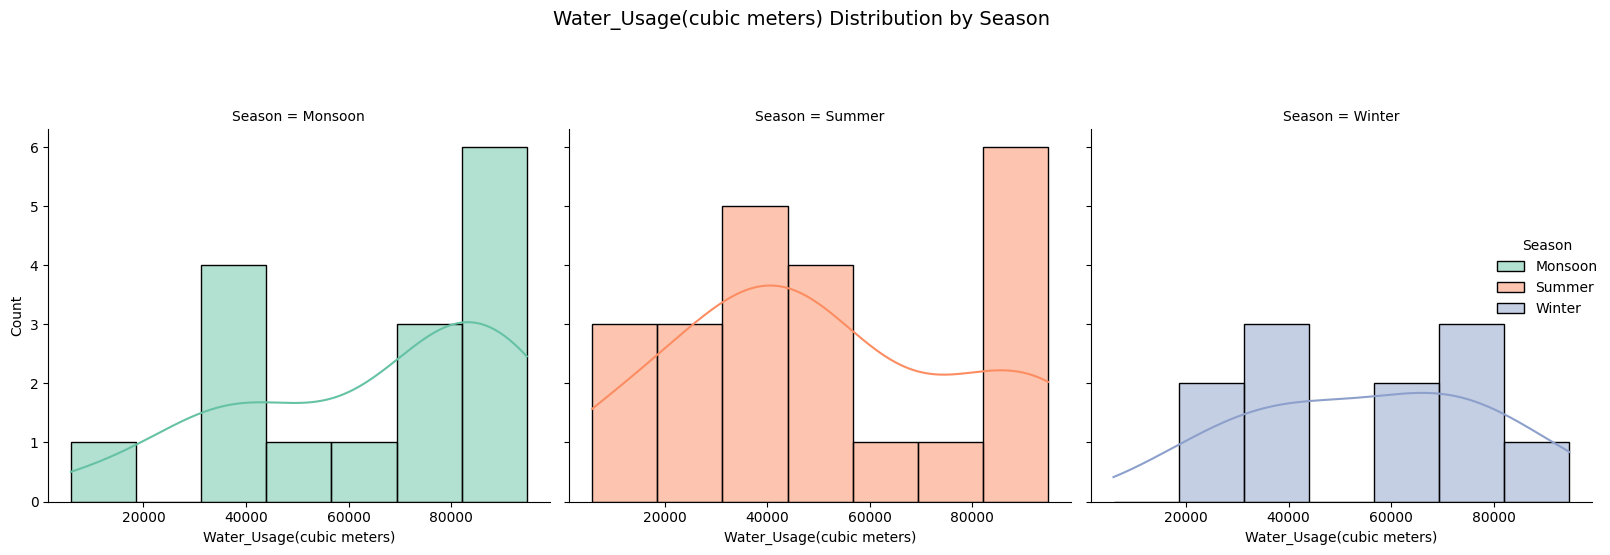

In [35]:
def create_displots_by_season(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=14, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Fertilizer_Used(tons)", "Yield(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots_by_season(df, columns_to_plot, col='Season', hue='Season')


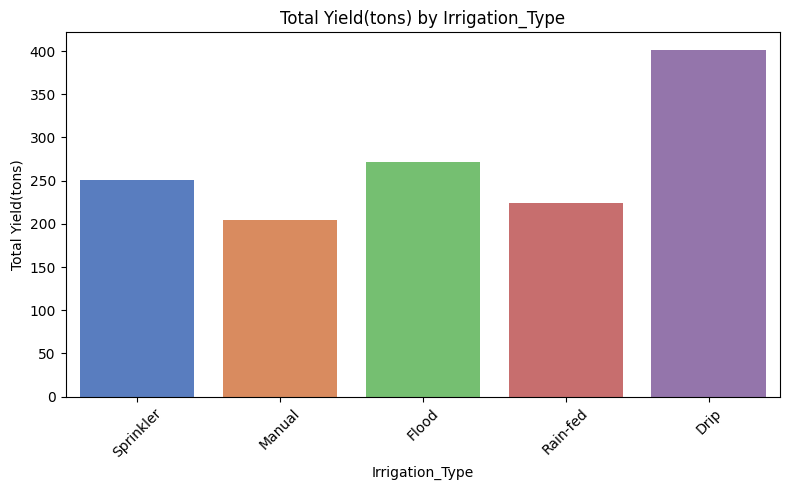

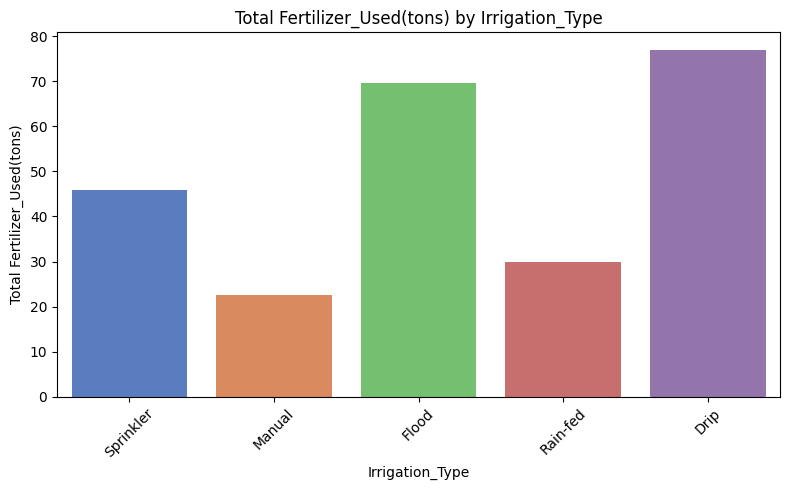

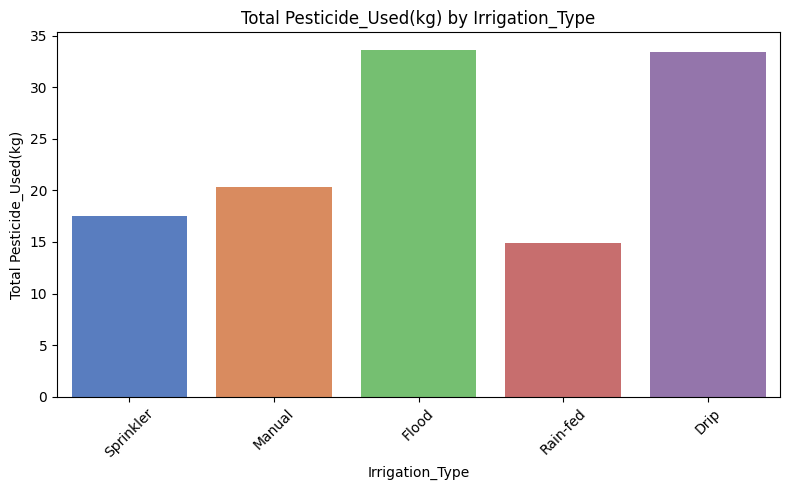

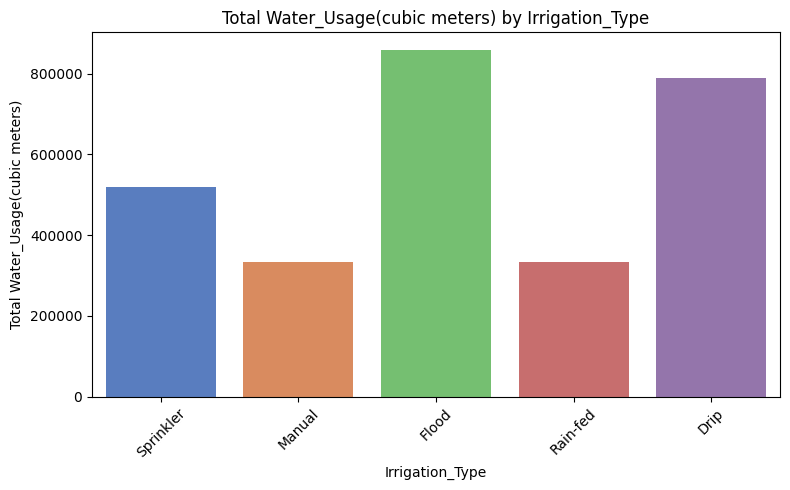

In [36]:
def create_bar_plots(data, x_column, y_columns, estimator=sum, ci=None, palette='muted'):
    for y_column in y_columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(data=data, x=x_column, y=y_column, ci=ci, estimator=estimator, palette=palette)
        plt.title(f'Total {y_column} by {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(f'Total {y_column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# List of y_columns to create bar plots for
y_columns = ['Yield(tons)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Water_Usage(cubic meters)']
create_bar_plots(df, 'Irrigation_Type', y_columns)

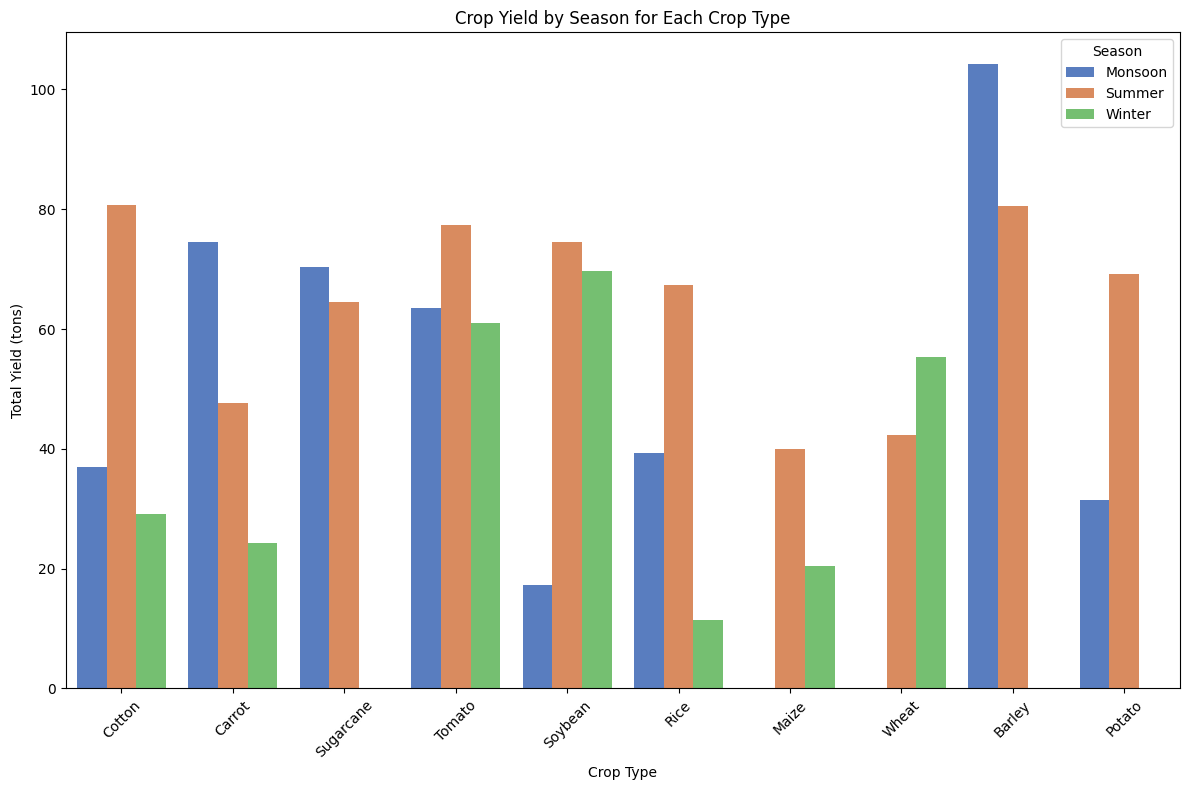

In [37]:
# Creating bar plots to visualize Crop Yield by Season for each Crop Type
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Yield(tons)', hue='Season', estimator=sum, ci=None, palette='muted')
plt.title('Crop Yield by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Yield (tons)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

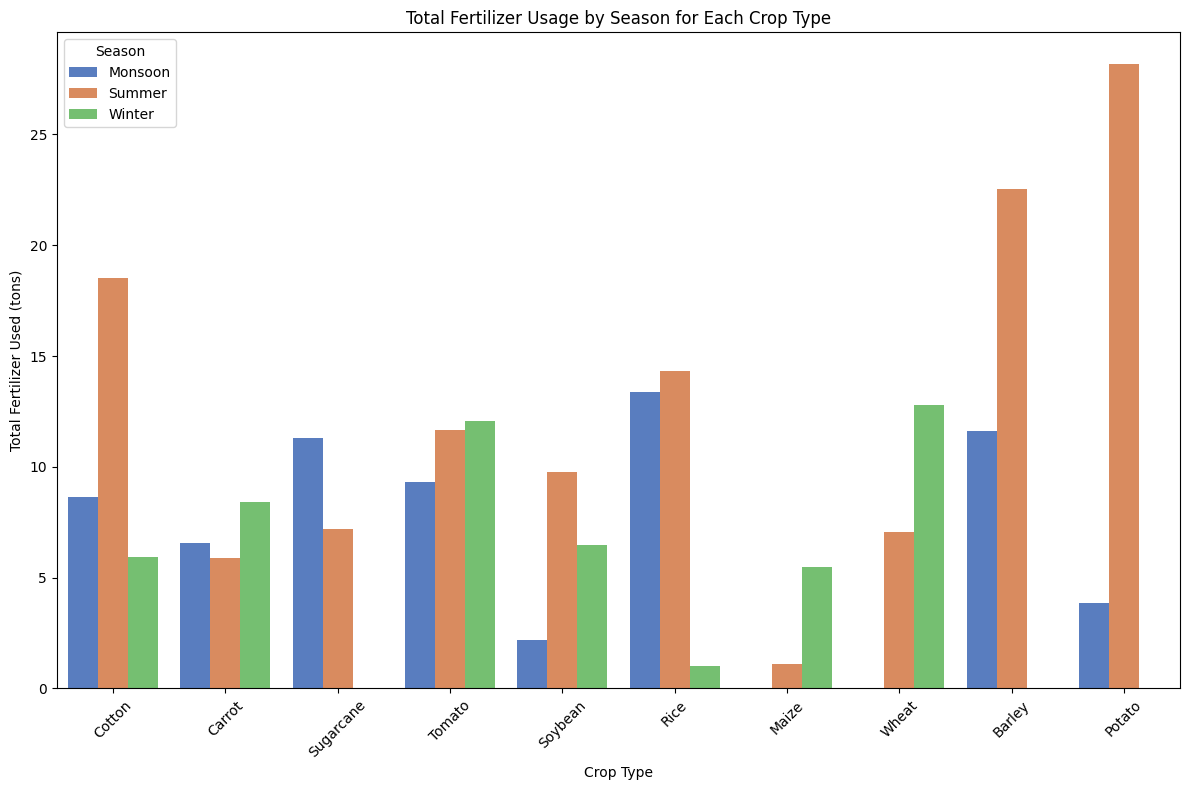

In [38]:
# Creating a bar plot to visualize total Fertilizer_Used(tons) by season for each crop type
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Fertilizer_Used(tons)', hue='Season', estimator=sum, ci=None, palette='muted')
plt.title('Total Fertilizer Usage by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Fertilizer Used (tons)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

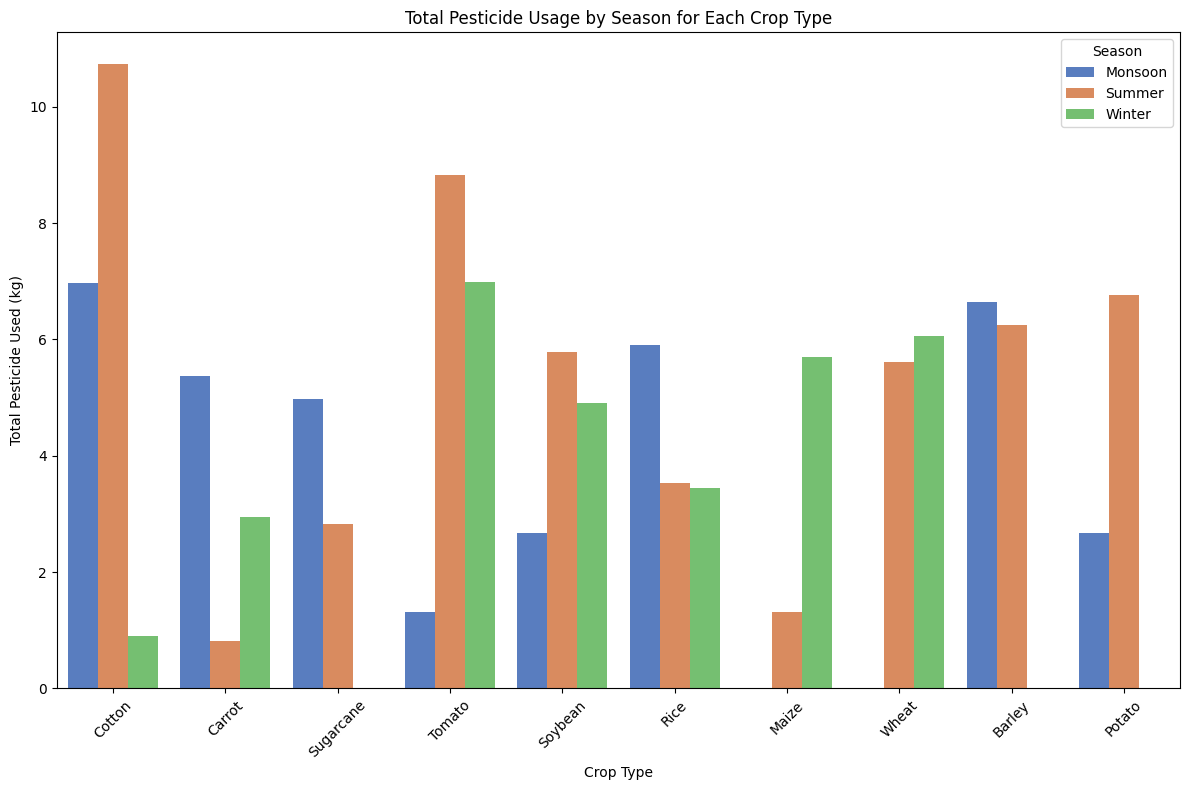

In [39]:
# Creating a count plot to visualize total pesticide usage by season for each crop type
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Pesticide_Used(kg)', hue='Season', estimator=sum, ci=None, palette='muted')

plt.title('Total Pesticide Usage by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Pesticide Used (kg)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

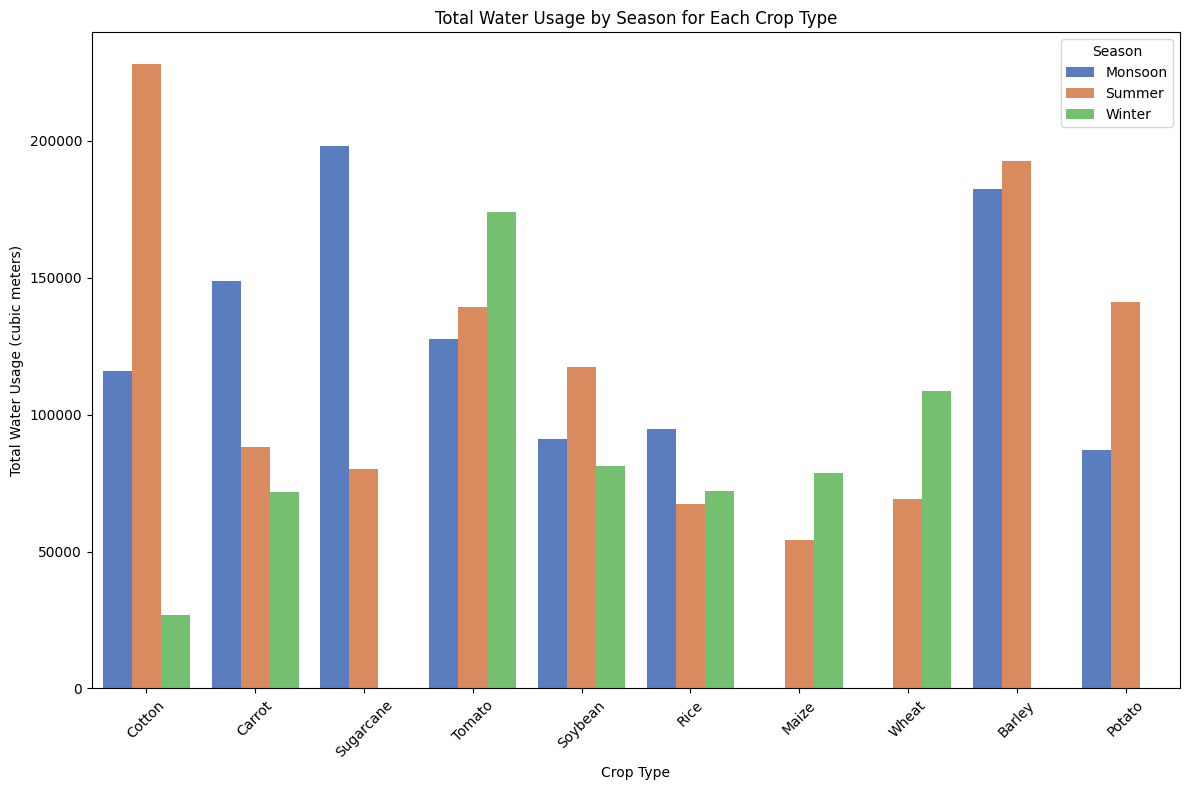

In [40]:
# Creating a bar plot to visualize total Water_Usage(cubic meters) by season for each crop type
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Water_Usage(cubic meters)', hue='Season', estimator=sum, ci=None, palette='muted')
plt.title('Total Water Usage by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Water Usage (cubic meters)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


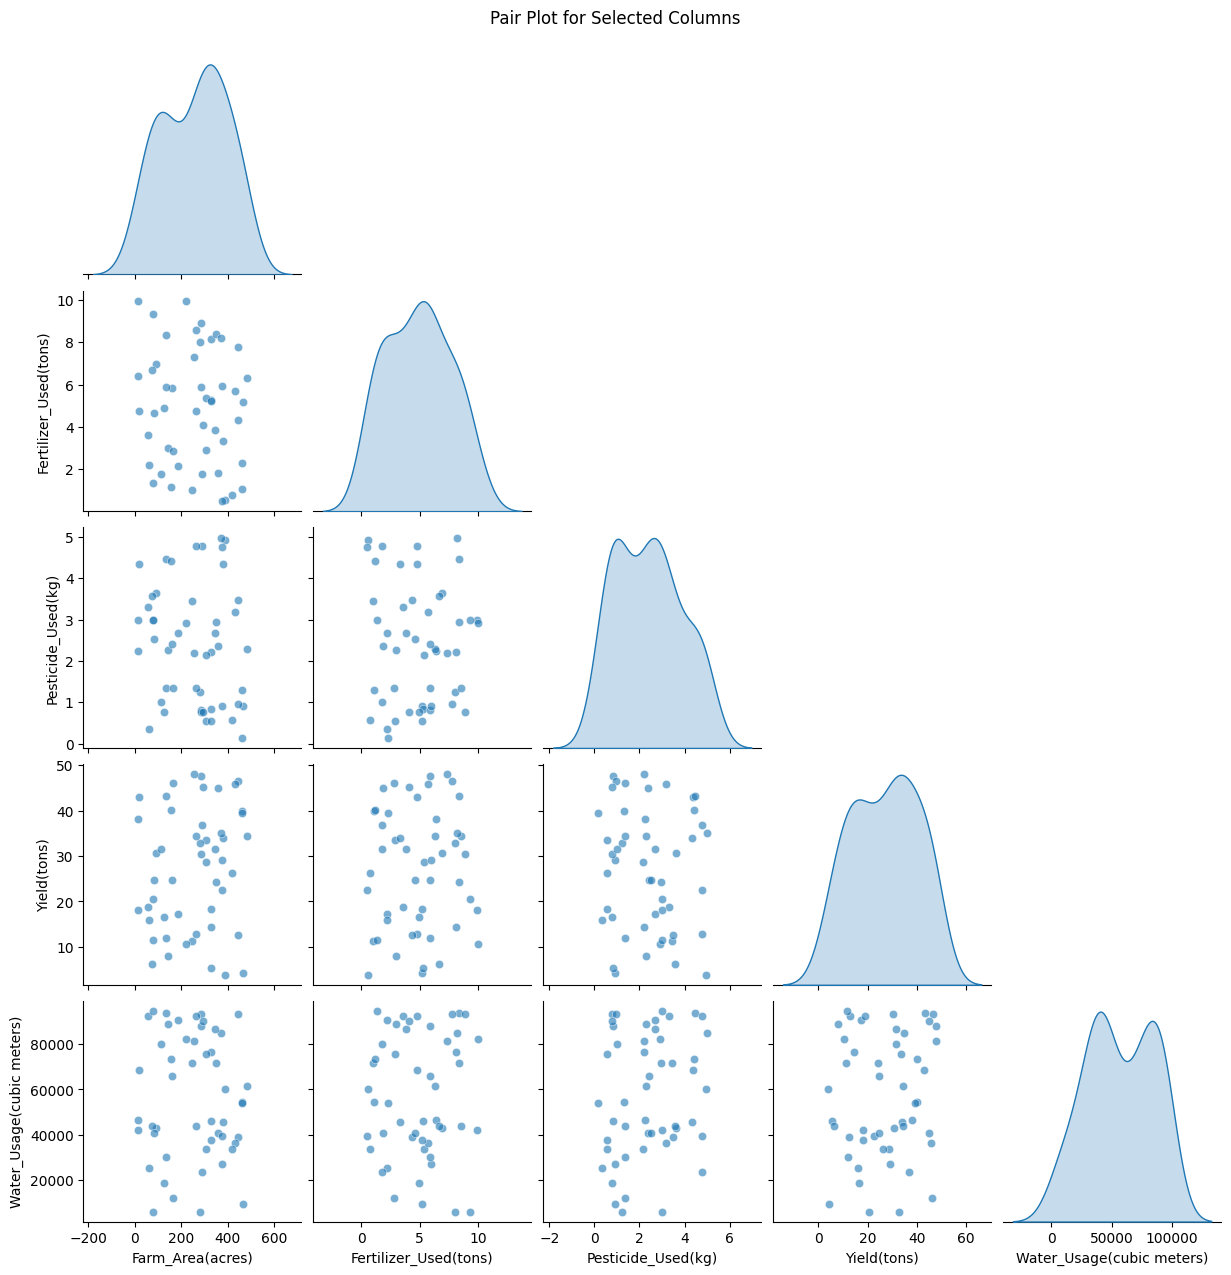

In [41]:
# Creating a pair plot for the specified columns
columns_to_pairplot = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

sns.pairplot(df[columns_to_pairplot], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot for Selected Columns', y=1.02)
plt.show()

In [42]:
print("=======================================================")
print("\n5. Data Preprocessing\n")
print("=======================================================")


5. Data Preprocessing



# 5. Data Preprocessing

In this section, we'll implement several data preprocessing techniques to prepare our dataset for machine learning models:

1. **Check for Missing Values**: Identify and handle any missing data in the dataset
2. **Encode Categorical Variables**: Convert categorical variables into numerical format
3. **Feature Scaling**: Normalize or standardize numerical features
4. **Feature Engineering**: Create new features or transform existing ones
5. **Train-Test Split**: Prepare data for model training and evaluation

In [43]:
# 5.1 Check for missing values
print("Checking for missing values in the dataset...")

# Count missing values in each column
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print("\nMissing Values Summary:")
print(missing_info[missing_info['Missing Values'] > 0])

if missing_info['Missing Values'].sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"Total missing values: {missing_info['Missing Values'].sum()}")

Checking for missing values in the dataset...

Missing Values Summary:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []
No missing values found in the dataset.


In [44]:
# 5.2 Encode categorical variables

# Identify categorical columns
print("Identifying categorical columns...")
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_columns)}")

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# One-Hot Encoding for categorical variables
print("\nPerforming one-hot encoding on categorical variables...")
df_encoded = pd.get_dummies(df_processed, columns=categorical_columns, drop_first=True)

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Encoded dataset shape: {df_encoded.shape}")

# Display the first few rows of the encoded dataset
print("\nFirst few rows of the encoded dataset:")
print(df_encoded.head())

Identifying categorical columns...
Categorical columns: ['Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']

Performing one-hot encoding on categorical variables...

Original dataset shape: (50, 10)
Encoded dataset shape: (50, 73)

First few rows of the encoded dataset:
   Farm_Area(acres)  Fertilizer_Used(tons)  Pesticide_Used(kg)  Yield(tons)  \
0            329.40                   8.14                2.21        14.44   
1             18.67                   4.77                4.36        42.91   
2            306.03                   2.91                0.56        33.44   
3            380.21                   3.32                4.35        34.08   
4            135.56                   8.33                4.48        43.28   

   Water_Usage(cubic meters)  Farm_ID_F002  Farm_ID_F003  Farm_ID_F004  \
0                   76648.20         False         False         False   
1                   68725.54          True         False         False   
2                

In [45]:
# 5.3 Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Make a copy of the encoded dataframe
df_scaled = df_encoded.copy()

# Identify numerical columns (excluding Farm_ID which is an identifier)
numerical_columns = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Farm_ID' in numerical_columns:
    numerical_columns.remove('Farm_ID')

print(f"Numerical columns to be scaled: {numerical_columns}")

# Create a StandardScaler (z-score normalization)
standard_scaler = StandardScaler()

# Apply StandardScaler to numerical columns
df_standard_scaled = df_scaled.copy()
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df_scaled[numerical_columns])

print("\nAfter Standard Scaling (Z-score normalization):")
print(df_standard_scaled.head())

# Create a MinMaxScaler (normalization to [0,1] range)
min_max_scaler = MinMaxScaler()

# Apply MinMaxScaler to numerical columns
df_minmax_scaled = df_scaled.copy()
df_minmax_scaled[numerical_columns] = min_max_scaler.fit_transform(df_scaled[numerical_columns])

print("\nAfter Min-Max Scaling (normalization to [0,1]):")
print(df_minmax_scaled.head())

# We'll proceed with the StandardScaler for our analysis
df_preprocessed = df_standard_scaled.copy()
print("\nWe'll use the StandardScaler for our further analysis.")

Numerical columns to be scaled: ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

After Standard Scaling (Z-score normalization):
   Farm_Area(acres)  Fertilizer_Used(tons)  Pesticide_Used(kg)  Yield(tons)  \
0          0.539328               1.195687           -0.132008    -0.955156   
1         -1.712068              -0.050051            1.377660     1.199759   
2          0.370001              -0.737610           -1.290590     0.482967   
3          0.907472              -0.586051            1.370638     0.531409   
4         -0.865141               1.265921            1.461920     1.227764   

   Water_Usage(cubic meters)  Farm_ID_F002  Farm_ID_F003  Farm_ID_F004  \
0                   0.738169         False         False         False   
1                   0.444639          True         False         False   
2                   0.697058         False          True         False   
3                  -0.419513        

In [46]:
# 5.4 Feature Engineering
import numpy as np

# Make a copy of our preprocessed dataframe
df_engineered = df_preprocessed.copy()

# 1. Create a feature for farm size category
farm_size_mapping = {
    'small': 0,
    'medium': 1,
    'large': 2
}

farm_area_column = [col for col in df.columns if 'Farm_Area' in col][0]
q25, q75 = np.percentile(df[farm_area_column], [25, 75])

df_engineered['Farm_Size_Category'] = pd.cut(
    df[farm_area_column], 
    bins=[0, q25, q75, float('inf')],
    labels=[farm_size_mapping['small'], farm_size_mapping['medium'], farm_size_mapping['large']]
)

# 2. Create a feature for fertilizer-to-area ratio
fertilizer_column = [col for col in df.columns if 'Fertilizer_Used' in col][0]
df_engineered['Fertilizer_per_Acre'] = df[fertilizer_column] / df[farm_area_column]

# 3. Create a feature for water-usage-to-area ratio
water_column = [col for col in df.columns if 'Water_Usage' in col][0]
df_engineered['Water_per_Acre'] = df[water_column] / df[farm_area_column]

# 4. Create a feature for pesticide-to-area ratio
pesticide_column = [col for col in df.columns if 'Pesticide_Used' in col][0]
df_engineered['Pesticide_per_Acre'] = df[pesticide_column] / df[farm_area_column]

print("Engineered features added to the dataset:")
print("- Farm_Size_Category: Categorical size based on farm area")
print("- Fertilizer_per_Acre: Ratio of fertilizer used to farm area")
print("- Water_per_Acre: Ratio of water usage to farm area")
print("- Pesticide_per_Acre: Ratio of pesticide used to farm area")

print("\nShape of the dataset after feature engineering:", df_engineered.shape)
print("\nNew features overview:")
print(df_engineered[['Farm_Size_Category', 'Fertilizer_per_Acre', 'Water_per_Acre', 'Pesticide_per_Acre']].head())

Engineered features added to the dataset:
- Farm_Size_Category: Categorical size based on farm area
- Fertilizer_per_Acre: Ratio of fertilizer used to farm area
- Water_per_Acre: Ratio of water usage to farm area
- Pesticide_per_Acre: Ratio of pesticide used to farm area

Shape of the dataset after feature engineering: (50, 77)

New features overview:
  Farm_Size_Category  Fertilizer_per_Acre  Water_per_Acre  Pesticide_per_Acre
0                  1             0.024712      232.690346            0.006709
1                  0             0.255490     3681.068024            0.233530
2                  1             0.009509      246.833840            0.001830
3                  2             0.008732      119.410931            0.011441
4                  0             0.061449      691.344718            0.033048


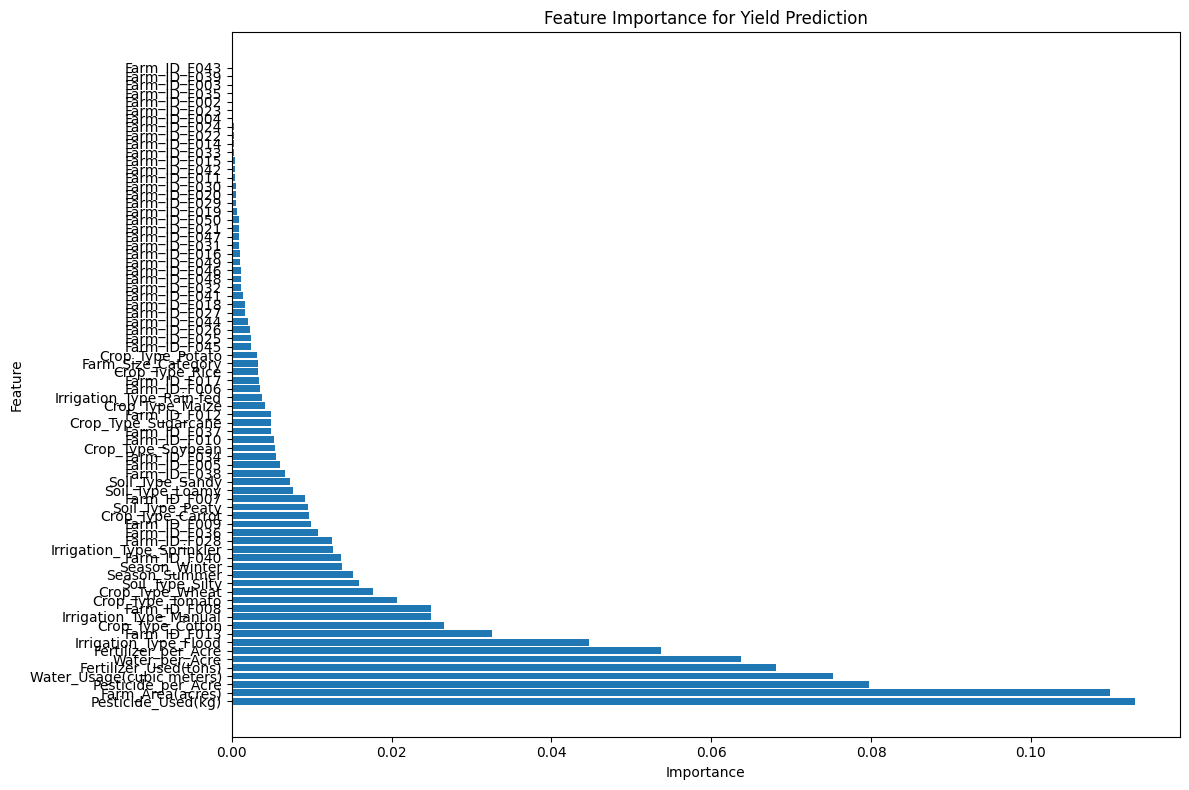

Top 10 most important features:
                      Feature  Importance
2          Pesticide_Used(kg)    0.112993
0            Farm_Area(acres)    0.109874
75         Pesticide_per_Acre    0.079729
3   Water_Usage(cubic meters)    0.075191
1       Fertilizer_Used(tons)    0.068041
74             Water_per_Acre    0.063669
73        Fertilizer_per_Acre    0.053724
62      Irrigation_Type_Flood    0.044730
15               Farm_ID_F013    0.032520
54           Crop_Type_Cotton    0.026524

Features selected (top 80% cumulative importance):
['Pesticide_Used(kg)', 'Farm_Area(acres)', 'Pesticide_per_Acre', 'Water_Usage(cubic meters)', 'Fertilizer_Used(tons)', 'Water_per_Acre', 'Fertilizer_per_Acre', 'Irrigation_Type_Flood', 'Farm_ID_F013', 'Crop_Type_Cotton', 'Irrigation_Type_Manual', 'Farm_ID_F008', 'Crop_Type_Tomato', 'Crop_Type_Wheat', 'Soil_Type_Silty', 'Season_Summer']

Shape of selected features dataset: (50, 16)


In [47]:
# 5.5 Feature Selection/Importance
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Identify the target variable column 
target_column = 'Yield(tons)'

# Make a copy of our engineered dataframe
df_feature_selection = df_engineered.copy()

# Separate features and target variable
X = df_feature_selection.drop([target_column], axis=1)
y = df_feature_selection[target_column]

# Initialize and fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Yield Prediction')
plt.tight_layout()
plt.show()

# Print the top 10 most important features
print("Top 10 most important features:")
print(feature_importances.head(10))

# Select top features (keeping top 80% of cumulative importance)
cumulative_importance = feature_importances['Importance'].cumsum()
importance_threshold = 0.8
important_features = feature_importances.loc[cumulative_importance <= importance_threshold, 'Feature']

print(f"\nFeatures selected (top {importance_threshold*100:.0f}% cumulative importance):")
print(list(important_features))

# Create a dataset with selected features
X_selected = X[important_features]
print(f"\nShape of selected features dataset: {X_selected.shape}")

In [48]:
# 5.6 Train-Test Split
from sklearn.model_selection import train_test_split

# Create a dataset with all features and the selected features
X_all = X.copy()
y_all = y.copy()

X_selected = X[important_features].copy()

# Split the data with all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Split the data with selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_all, test_size=0.2, random_state=42
)

print("Train-Test Split Completed:")
print(f"All Features - Training set shape: {X_train_all.shape}, Test set shape: {X_test_all.shape}")
print(f"Selected Features - Training set shape: {X_train_selected.shape}, Test set shape: {X_test_selected.shape}")

# Save the preprocessed datasets for later use
import os

# Create a directory for preprocessed data if it doesn't exist
if not os.path.exists('preprocessed_data'):
    os.makedirs('preprocessed_data')

# Save the datasets
import pickle

preprocessed_data = {
    'X_train_all': X_train_all,
    'X_test_all': X_test_all,
    'y_train_all': y_train_all,
    'y_test_all': y_test_all,
    'X_train_selected': X_train_selected,
    'X_test_selected': X_test_selected,
    'y_train_selected': y_train_selected,
    'y_test_selected': y_test_selected,
    'feature_importances': feature_importances,
    'important_features': important_features,
    'standard_scaler': standard_scaler,
    'min_max_scaler': min_max_scaler
}

with open('preprocessed_data/preprocessed_datasets.pkl', 'wb') as f:
    pickle.dump(preprocessed_data, f)

print("\nPreprocessed datasets saved to 'preprocessed_data/preprocessed_datasets.pkl'")
print("Data preprocessing complete and ready for model training!")

Train-Test Split Completed:
All Features - Training set shape: (40, 76), Test set shape: (10, 76)
Selected Features - Training set shape: (40, 16), Test set shape: (10, 16)

Preprocessed datasets saved to 'preprocessed_data/preprocessed_datasets.pkl'
Data preprocessing complete and ready for model training!


# Data Preprocessing Summary

In this section, we've completed the following preprocessing steps:

1. **Missing Values Handling**
   - Checked for any missing values in the dataset
   
2. **Categorical Variables Encoding**
   - Applied one-hot encoding to categorical variables like Crop_Type, Irrigation_Type, Soil_Type, and Season
   
3. **Feature Scaling**
   - Applied StandardScaler to normalize numerical features (mean=0, std=1)
   - Also demonstrated MinMaxScaler as an alternative scaling method
   
4. **Feature Engineering**
   - Created Farm_Size_Category based on farm area quartiles
   - Added ratios: Fertilizer_per_Acre, Water_per_Acre, and Pesticide_per_Acre
   
5. **Feature Selection/Importance**
   - Used RandomForestRegressor to identify the most important features
   - Selected features that contribute to 80% of the cumulative importance
   
6. **Train-Test Split**
   - Split the data into training (80%) and testing (20%) sets
   - Created splits for both all features and selected important features
   - Saved all preprocessed datasets for later use

These preprocessing steps have prepared our data for machine learning model training in the next section.